In [236]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.font_manager import FontProperties
import seaborn as sns

dpi = 300
mpl.rcParams['figure.dpi']= dpi

sns.set(font=['sans-serif'])
sns.set_style("whitegrid",{"font.sans-serif":['Microsoft JhengHei']})
#sns.set_style("whitegrid",{"font.sans-serif":['Microsoft YaHei']})

In [206]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:10000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [207]:
tags = ['位置', '服务', '价格', '环境', '菜品',  '其他']
attrs = ['交通是否便利', '距离商圈远近', '是否容易寻找',
         '排队等候时间', '服务人员态度', '是否容易停车', '点菜/上菜速度',
         '价格水平', '性价比', '折扣力度',
         '装修情况', '嘈杂情况', '就餐空间', '卫生情况', 
         '分量', '口感', '外观', '推荐程度',
         '本次消费感受', '再次消费的意愿']
classes = ['未提及', '负面', '中性', '正面']

In [208]:
df = pd.read_csv('./train.csv')

In [209]:
cols = df.columns[2:22]
for col, attr in zip(cols, attrs):
  vals = df[col].values
  vals = [classes[x + 2] for x in vals]
  df[attr] = vals

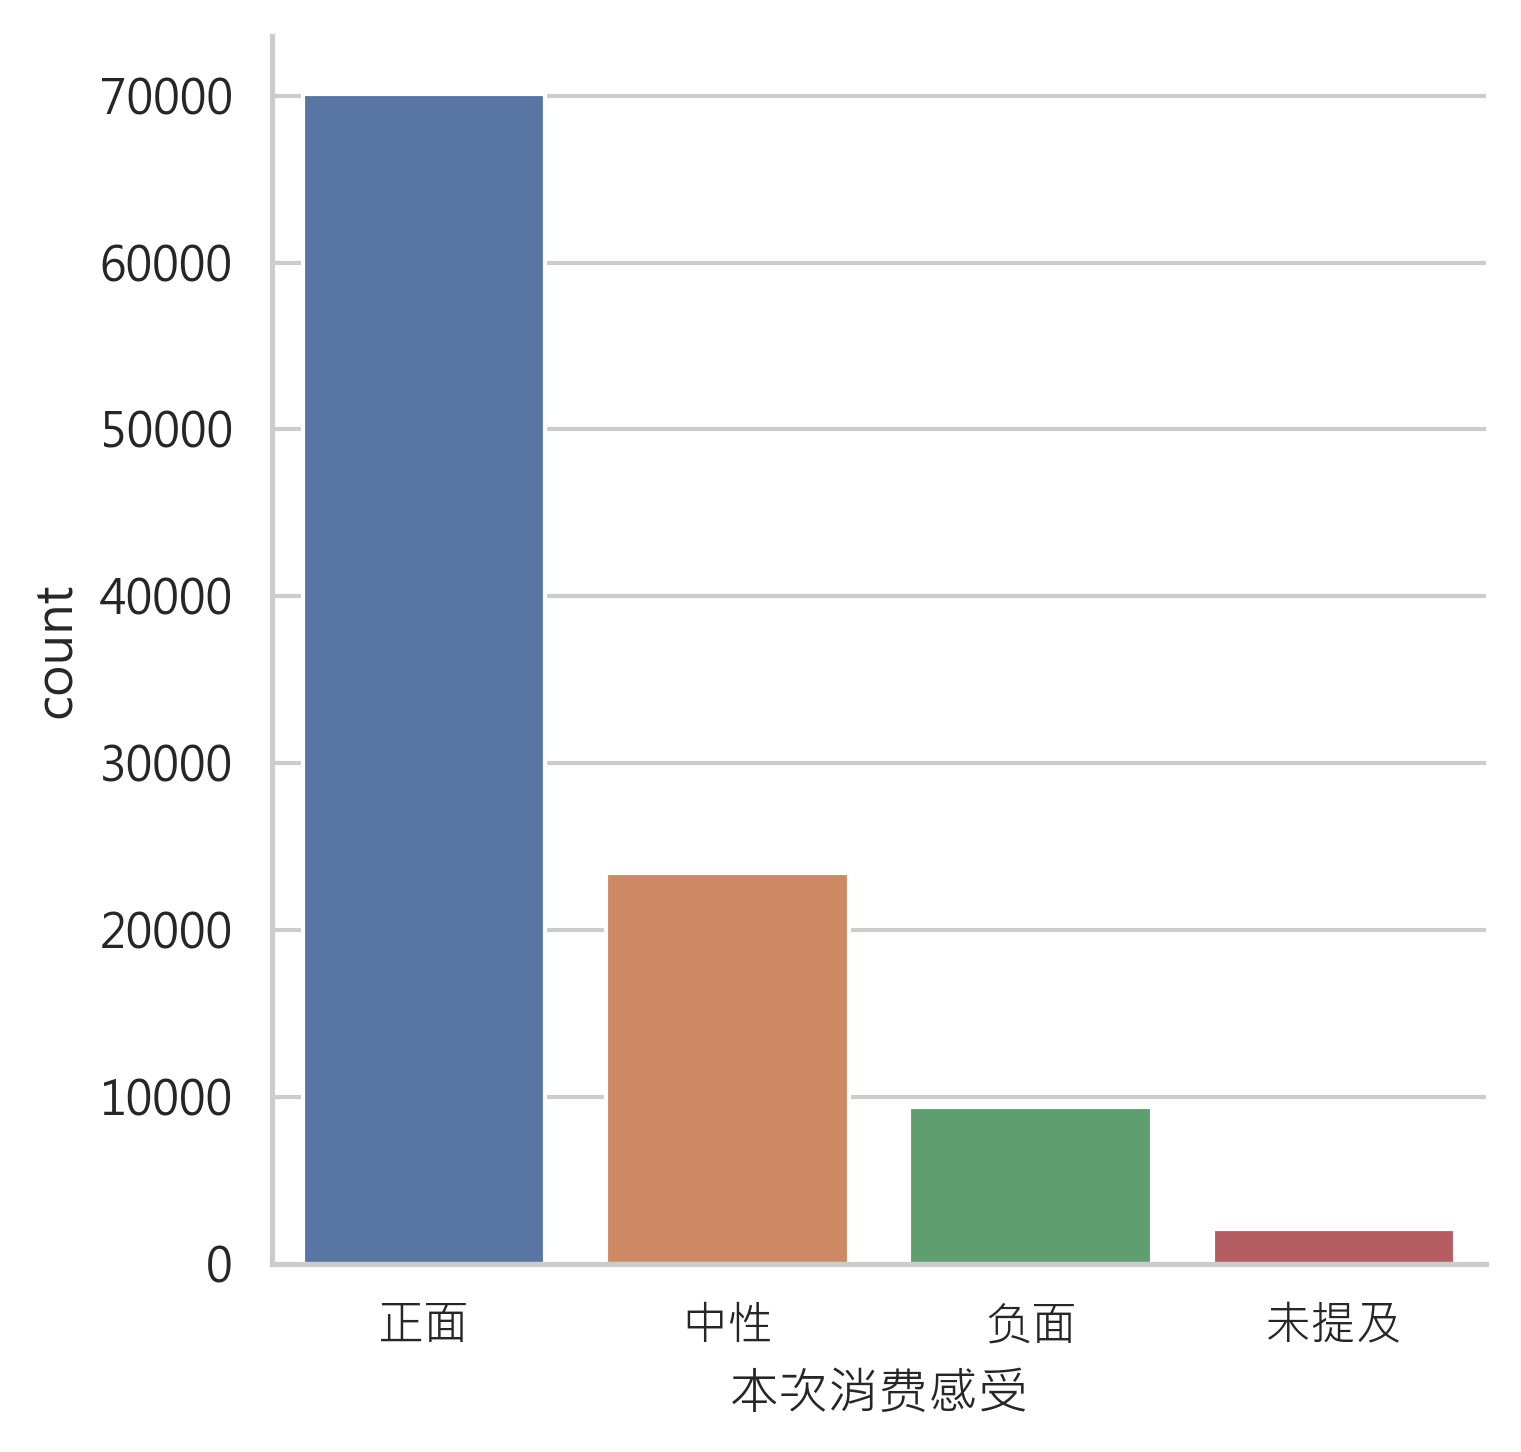

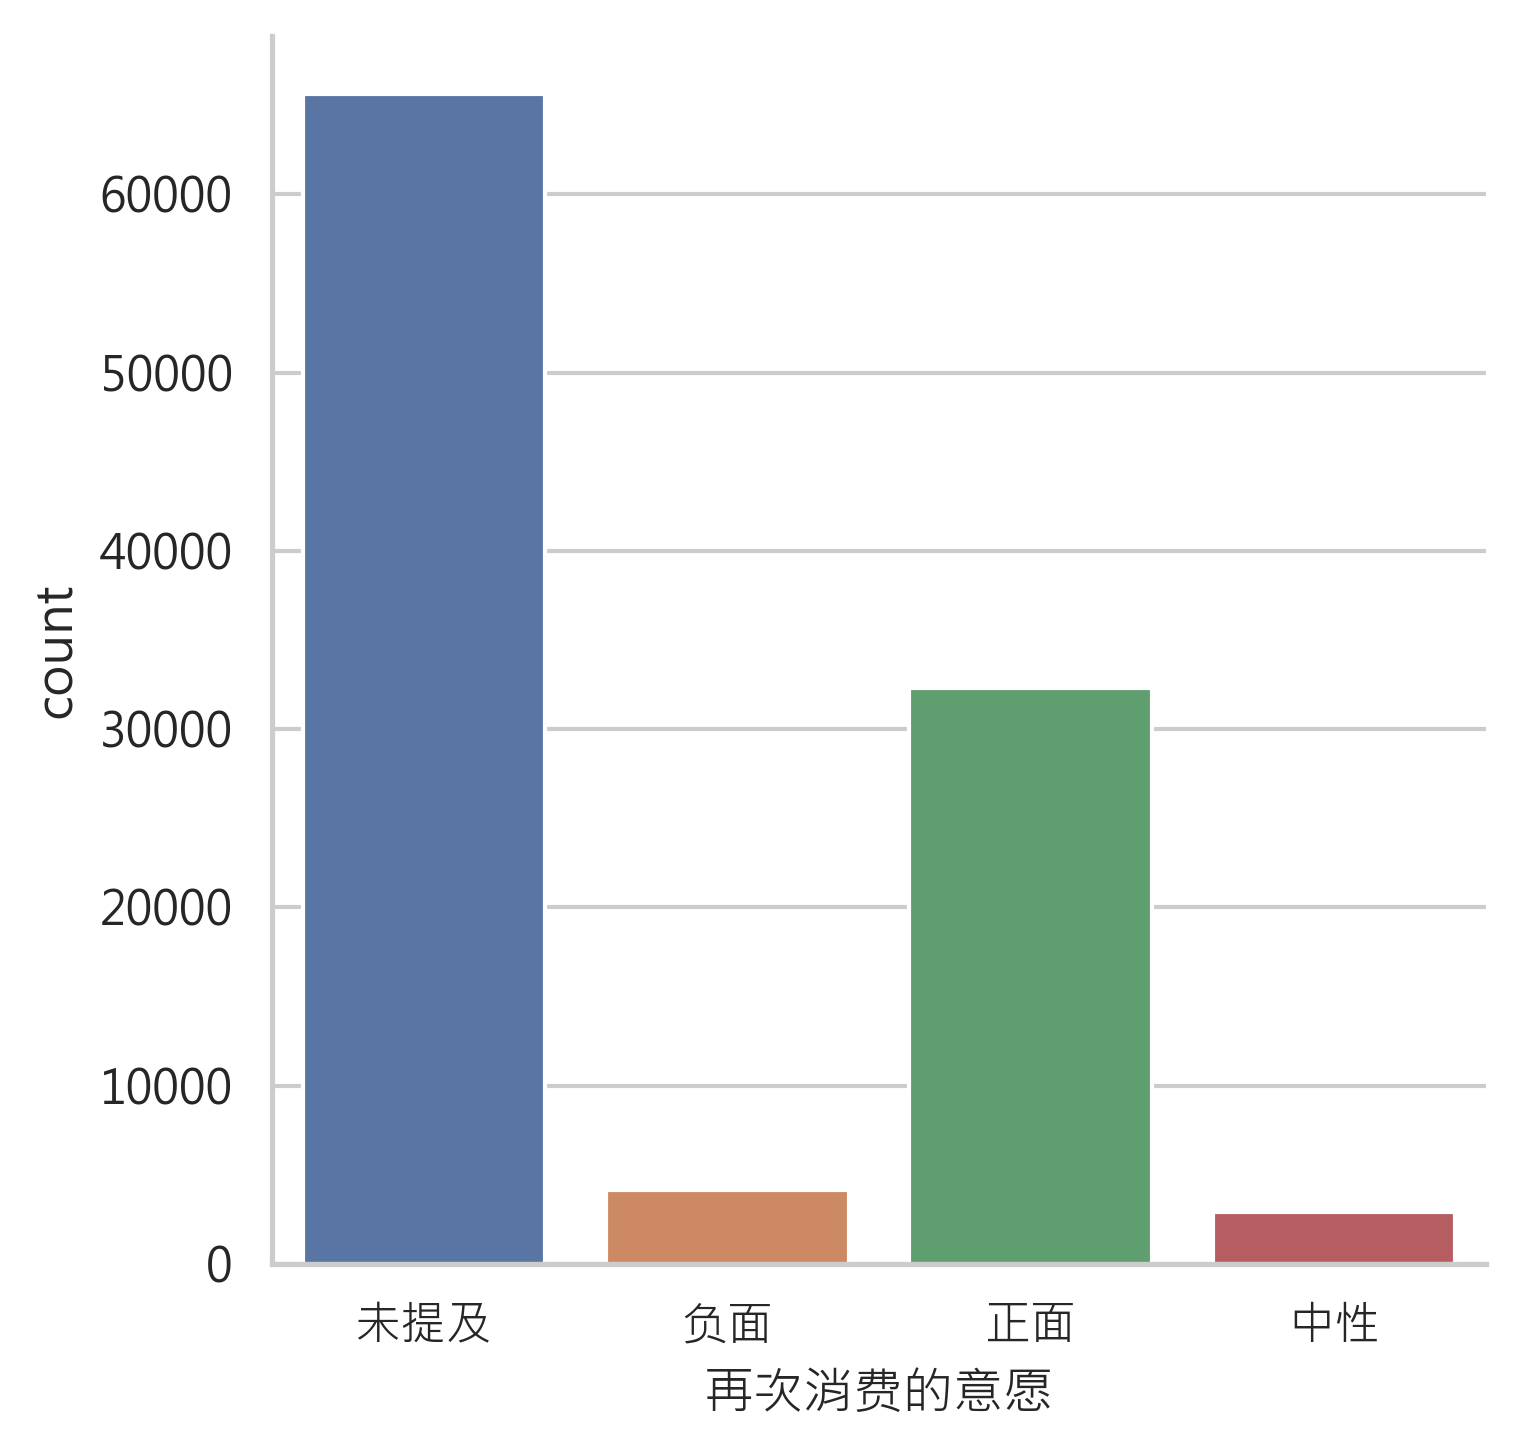

In [237]:
sns.catplot(attrs[-2], data=df, kind='count')
sns.catplot(attrs[-1], data=df, kind='count')

In [88]:
from pyecharts import Bar, configure

configure(output_image='pdf')

bar = Bar("我的第一个图表", "这里是副标题")
bar.add("服装", ["衬衫", "羊毛衫", "雪纺衫", "裤子", "高跟鞋", "袜子"], [5, 20, 36, 10, 75, 90], legend_text_size=39)
#bar.show_config()
bar # 将在 jupyter 中显示为 pdf 文件，并不保存为本地 pdf 文件。

In [99]:
import pyecharts
line = pyecharts.Line("气温变化折线图", '2018-4-16', title_pos='center')
line.add("服装", ["衬衫", "羊毛衫", "雪纺衫", "裤子", "高跟鞋", "袜子"], [5, 20, 36, 10, 75, 90], mark_point=['max'], legend_pos='left')
#line.add("最低气温", cities, lows, mark_line=['average'], is_smooth=True)

In [8]:
def cat_count(attr):
  counts = df.groupby([attr]).size()
  return [counts[x] for x in classes]

In [9]:
from pyecharts import Bar, configure

configure(output_image='pdf')

bar = Bar('位置', title_text_size=36)

for i in range(0, 3):
  bar.add(attrs[i], classes, cat_count(attrs[i]), xaxis_label_textsize=30, legend_text_size=20)
#bar.show_config()
bar

In [10]:
bar = Bar('服务', title_text_size=36)

for i in range(3, 7):
  bar.add(attrs[i], classes, cat_count(attrs[i]), xaxis_label_textsize=30, legend_text_size=20)
bar

In [11]:
bar = Bar('价格', title_text_size=36)

for i in range(7, 10):
  bar.add(attrs[i], classes, cat_count(attrs[i]), xaxis_label_textsize=30, legend_text_size=25)
bar

In [12]:
bar = Bar('环境', title_text_size=36)

for i in range(10, 14):
  bar.add(attrs[i], classes, cat_count(attrs[i]), xaxis_label_textsize=30, legend_text_size=25)
bar

In [13]:
bar = Bar('菜品', title_text_size=36)

for i in range(14, 18):
  bar.add(attrs[i], classes, cat_count(attrs[i]), xaxis_label_textsize=30, legend_text_size=25)
bar

In [14]:
bar = Bar('其他', title_text_size=36)

for i in range(18, 20):
  bar.add(attrs[i], classes, cat_count(attrs[i]), xaxis_label_textsize=30, legend_text_size=25)
bar

In [15]:
from pyecharts import Bar

attr = ["{}月".format(i) for i in range(1, 8)]
v1 = [0, 100, 200, 300, 400, 220, 250]
v2 = [1000, 800, 600, 500, 450, 400, 300]
bar = Bar("瀑布图示例")
# 利用第一个 add() 图例的颜色为透明，即 'rgba(0,0,0,0)'，并且设置 is_stack 标志为 True
bar.add("def", attr, v1, label_color=['red'])
bar.add("月份", attr, v2, label_color=['green'])
bar

In [16]:
#python ~/steniment/evaluate.py; python correlation.py 
dir = '/home/gezi/data3/v11/submit.1115.2.2.2/7model'
models = np.load(f'{dir}/models.npy')
cm = np.load(f'{dir}/cm.npy')

In [17]:
models = [x for x in models if x != 'ensemble']

In [18]:
ncm = np.zeros([len(models), len(models)])

In [19]:
for i in range(len(models)):
  for j in range(len(models)):
    if i > 0:
      i_ = i + 1
    else:
      i_ = i
    if j > 0:
      j_ = j + 1
    else:
      j_ = j
    ncm[i, j] = cm[i_, j_]

In [20]:
ncm.shape

(7, 7)

In [21]:
len(models)

7

In [22]:
models

['char.nbert_tf.char.transformer.nbert.finetune',
 'word.jieba.ft_tf.word.rnetv2.gru.lm.unkaug',
 'word.sp10w.ft_torch.word.mreader.nopad.lm.lstm.bertopt.nolatt.unkaug.hidden400',
 'word.sp1w.ft_tf.word.rnet.gru.nolatt.hidden600',
 'word.sp20w.ft_tf.word.rnet.gru.unkaug',
 'word.sp20w.ft_tf.word.rnet.lstm.unkaug',
 'word.jieba.ft_torch.word.mreader.nopad.lm.lstm.bertopt.nolatt.unkaug.hidden400']

In [23]:
models = [x.replace('word.', '').replace('.nopad','').replace('.bertopt', '').replace('.tf', '').replace('.torch', '').replace('_', '.').replace('char.', '').replace('.word', '').replace('.unkaug', '').replace('lm', 'elmo').replace('.hidden400', '').replace('.hidden600', '').replace('.tf', '').replace('.torch', '').replace('.nolatt','').replace('.ft', '') for x in models]

In [24]:
models[0] = 'char.bert'
models[1] = models[1].replace('gru.elmo', 'elmo.gru')

In [25]:
models

['char.bert',
 'jieba.rnetv2.elmo.gru',
 'sp10w.mreader.elmo.lstm',
 'sp1w.rnet.gru',
 'sp20w.rnet.gru',
 'sp20w.rnet.lstm',
 'jieba.mreader.elmo.lstm']

In [26]:
cm = ncm

In [27]:
cm.shape

(7, 7)

In [28]:
cm

array([[1.        , 0.96970468, 0.9715044 , 0.97025394, 0.97006507,
        0.9707432 , 0.97275464],
       [0.96970468, 1.        , 0.98257916, 0.98191659, 0.98151083,
        0.9816018 , 0.98558189],
       [0.9715044 , 0.98257916, 1.        , 0.98279696, 0.98544462,
        0.98707933, 0.98836242],
       [0.97025394, 0.98191659, 0.98279696, 1.        , 0.98378369,
        0.9841393 , 0.98403441],
       [0.97006507, 0.98151083, 0.98544462, 0.98378369, 1.        ,
        0.99048502, 0.9839939 ],
       [0.9707432 , 0.9816018 , 0.98707933, 0.9841393 , 0.99048502,
        1.        , 0.98538368],
       [0.97275464, 0.98558189, 0.98836242, 0.98403441, 0.9839939 ,
        0.98538368, 1.        ]])

In [29]:
#(cm * 1000).astype(np.int32)
amin, amax = cm.min(), cm.max() # 求最大最小值
cm2 = (cm-amin)/(amax-amin) # (矩阵元素-最小值)/(最大值-最小值)

In [30]:
cm2

array([[1.00000000e+00, 0.00000000e+00, 5.94056752e-02, 1.81300695e-02,
        1.18957014e-02, 3.42798691e-02, 1.00674282e-01],
       [3.66466898e-15, 1.00000000e+00, 4.24965834e-01, 4.03095540e-01,
        3.89701873e-01, 3.92704812e-01, 5.24081105e-01],
       [5.94056752e-02, 4.24965834e-01, 1.00000000e+00, 4.32155132e-01,
        5.19550047e-01, 5.73509323e-01, 6.15862119e-01],
       [1.81300695e-02, 4.03095540e-01, 4.32155132e-01, 1.00000000e+00,
        4.64725527e-01, 4.76463456e-01, 4.73001252e-01],
       [1.18957014e-02, 3.89701873e-01, 5.19550047e-01, 4.64725527e-01,
        1.00000000e+00, 6.85925600e-01, 4.71664289e-01],
       [3.42798691e-02, 3.92704812e-01, 5.73509323e-01, 4.76463456e-01,
        6.85925600e-01, 1.00000000e+00, 5.17538453e-01],
       [1.00674282e-01, 5.24081105e-01, 6.15862119e-01, 4.73001252e-01,
        4.71664289e-01, 5.17538453e-01, 1.00000000e+00]])

In [31]:
import random
from pyecharts import HeatMap

x_axis = models
y_axis = models
cm3 = (cm2 * 100).astype(np.int32)
data = [(i, j, cm3[i, j]) for i in range(len(models)) for j in range(len(models))]
heatmap = HeatMap()
heatmap.add("模型相关性", x_axis, y_axis, data, is_visualmap=True,
            visual_text_color="#000", 
            #visual_orient='horizontal', 
            visual_orient='vertical', 
            legend_text_size=30, 
            xaxis_rotate=10, 
            yaxis_rotate=0)
#heatmap.show_config()
heatmap

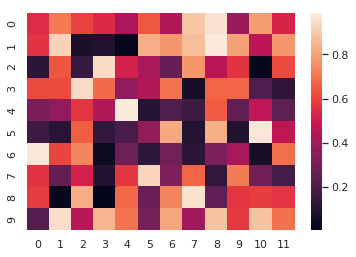

In [32]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data)

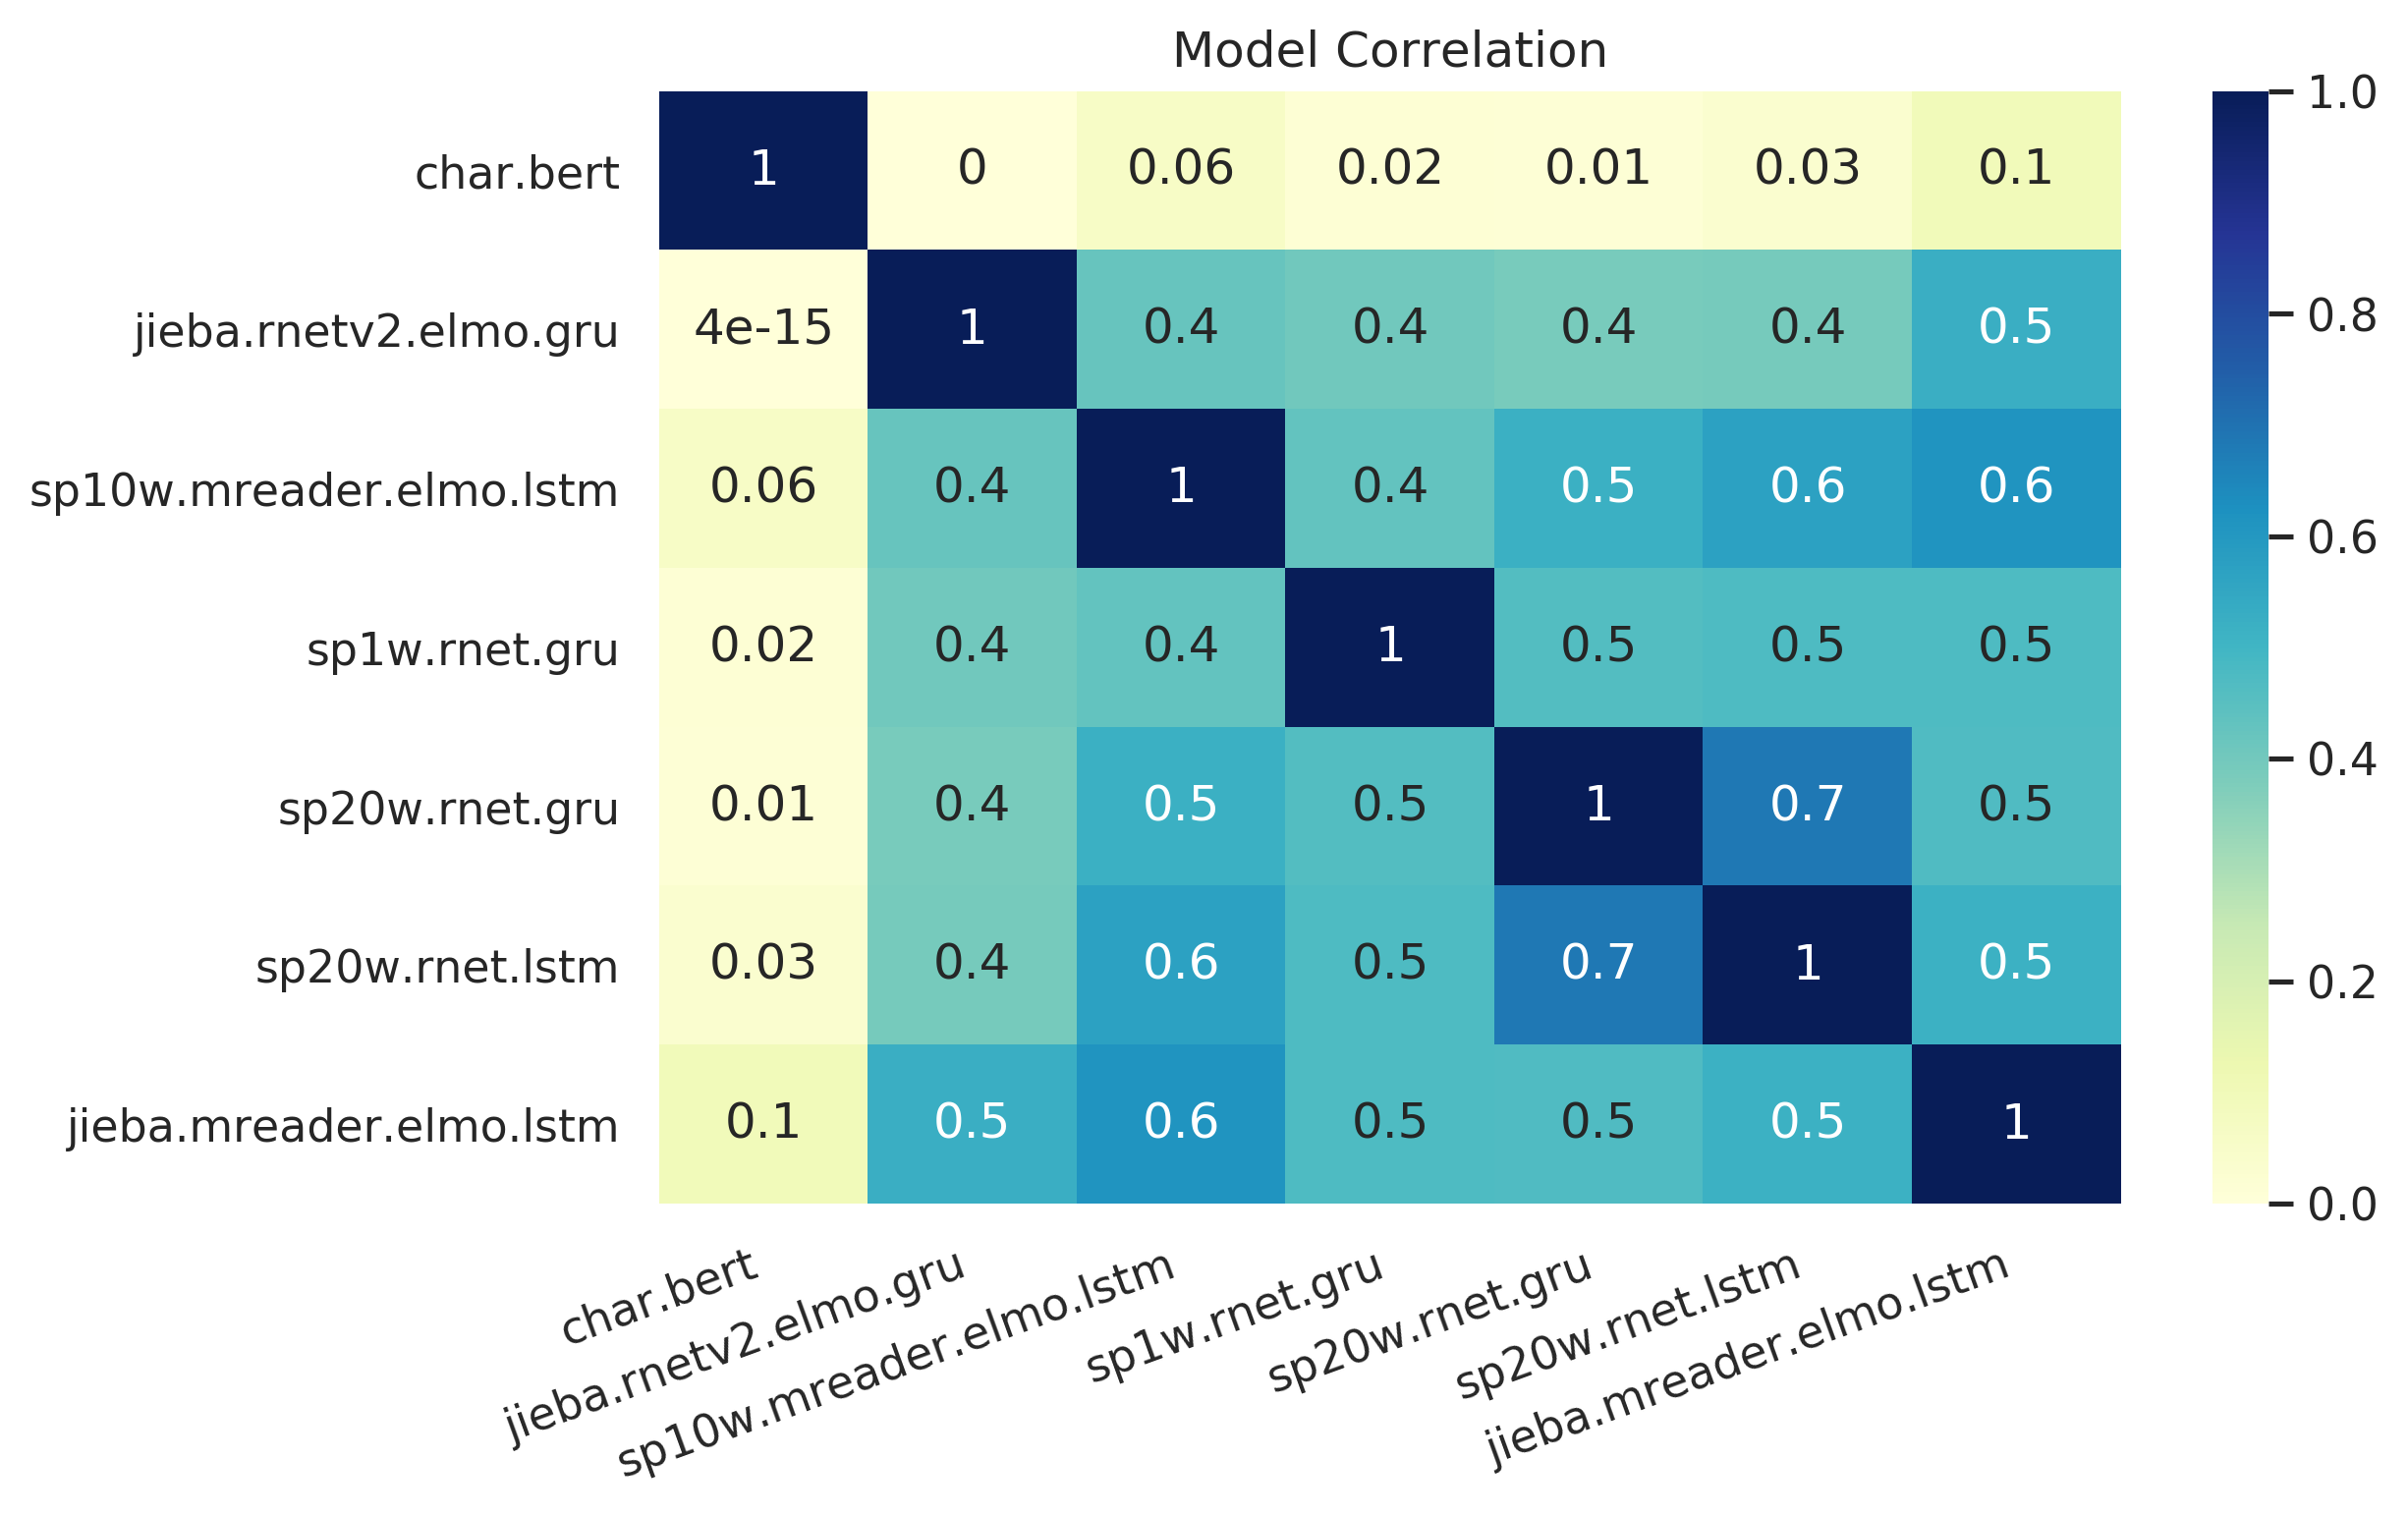

In [289]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.font_manager import FontProperties
import seaborn as sns

dpi = 300
mpl.rcParams['figure.dpi']= dpi

sns.set(font=['sans-serif'])
sns.set_style("whitegrid",{"font.sans-serif":['Microsoft JhengHei']})

import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
#ax = sns.heatmap(cm2, ax=ax,vmin=0, vmax=1,annot=True,fmt ='0.1g', xticklabels=models, yticklabels=models)
#ax = sns.heatmap(cm2,cmap = 'RdBu',ax=ax,vmin=0, vmax=1,annot=True,fmt ='0.1g', xticklabels=models, yticklabels=models)
ax = sns.heatmap(cm2,cmap="YlGnBu",ax=ax,vmin=0, vmax=1,annot=True,fmt ='0.1g', xticklabels=models, yticklabels=models)
#设置坐标字体方向
label_y = ax.get_yticklabels()
plt.setp(label_y, rotation=0, horizontalalignment='right')
label_x = ax.get_xticklabels()
plt.setp(label_x, rotation=20, horizontalalignment='right')
plt.title('Model Correlation')#标题
plt.show()

In [82]:
seg_methods = ['char', 'jieba', 'sp1w', 'sp10w', 'sp20w']
vocab_sizes = [6797, 144298, 12611, 100850, 198057]
min_lens = [19, 12, 8, 7, 7]
max_lens = [2003, 1365, 1702, 1287, 1212]
mean_lens = [344.661, 225.6477, 217.9499, 166.4245, 156.068]
unks_perdoc = [0.042, 1.353, 0.0304, 0.0308, 0.016019]
unks_perdoc_testb = [0.074, 1.7338, 0.280565, 0.280895, 0.052255]

In [78]:
bar = Bar('文本长度统计', title_text_size=36)

#for i, method in enumerate(seg_methods):
bar.add('min', seg_methods, min_lens, xaxis_label_textsize=30, legend_text_size=25)
bar.add('max', seg_methods, max_lens, xaxis_label_textsize=30, legend_text_size=25)
bar.add('mean', seg_methods, mean_lens, xaxis_label_textsize=30, legend_text_size=25)
bar

In [83]:
bar = Bar('词汇量', title_text_size=36)

#for i, method in enumerate(seg_methods):
bar.add('vocab_size', seg_methods, vocab_sizes, xaxis_label_textsize=30, legend_text_size=25)
bar

In [85]:
bar = Bar('未登录词', title_text_size=36)

#for i, method in enumerate(seg_methods):
bar.add('unks_perdoc', seg_methods, unks_perdoc, xaxis_label_textsize=30, legend_text_size=25)
bar.add('unks_perdoc_testb', seg_methods, unks_perdoc_testb, xaxis_label_textsize=30, legend_text_size=25)
bar

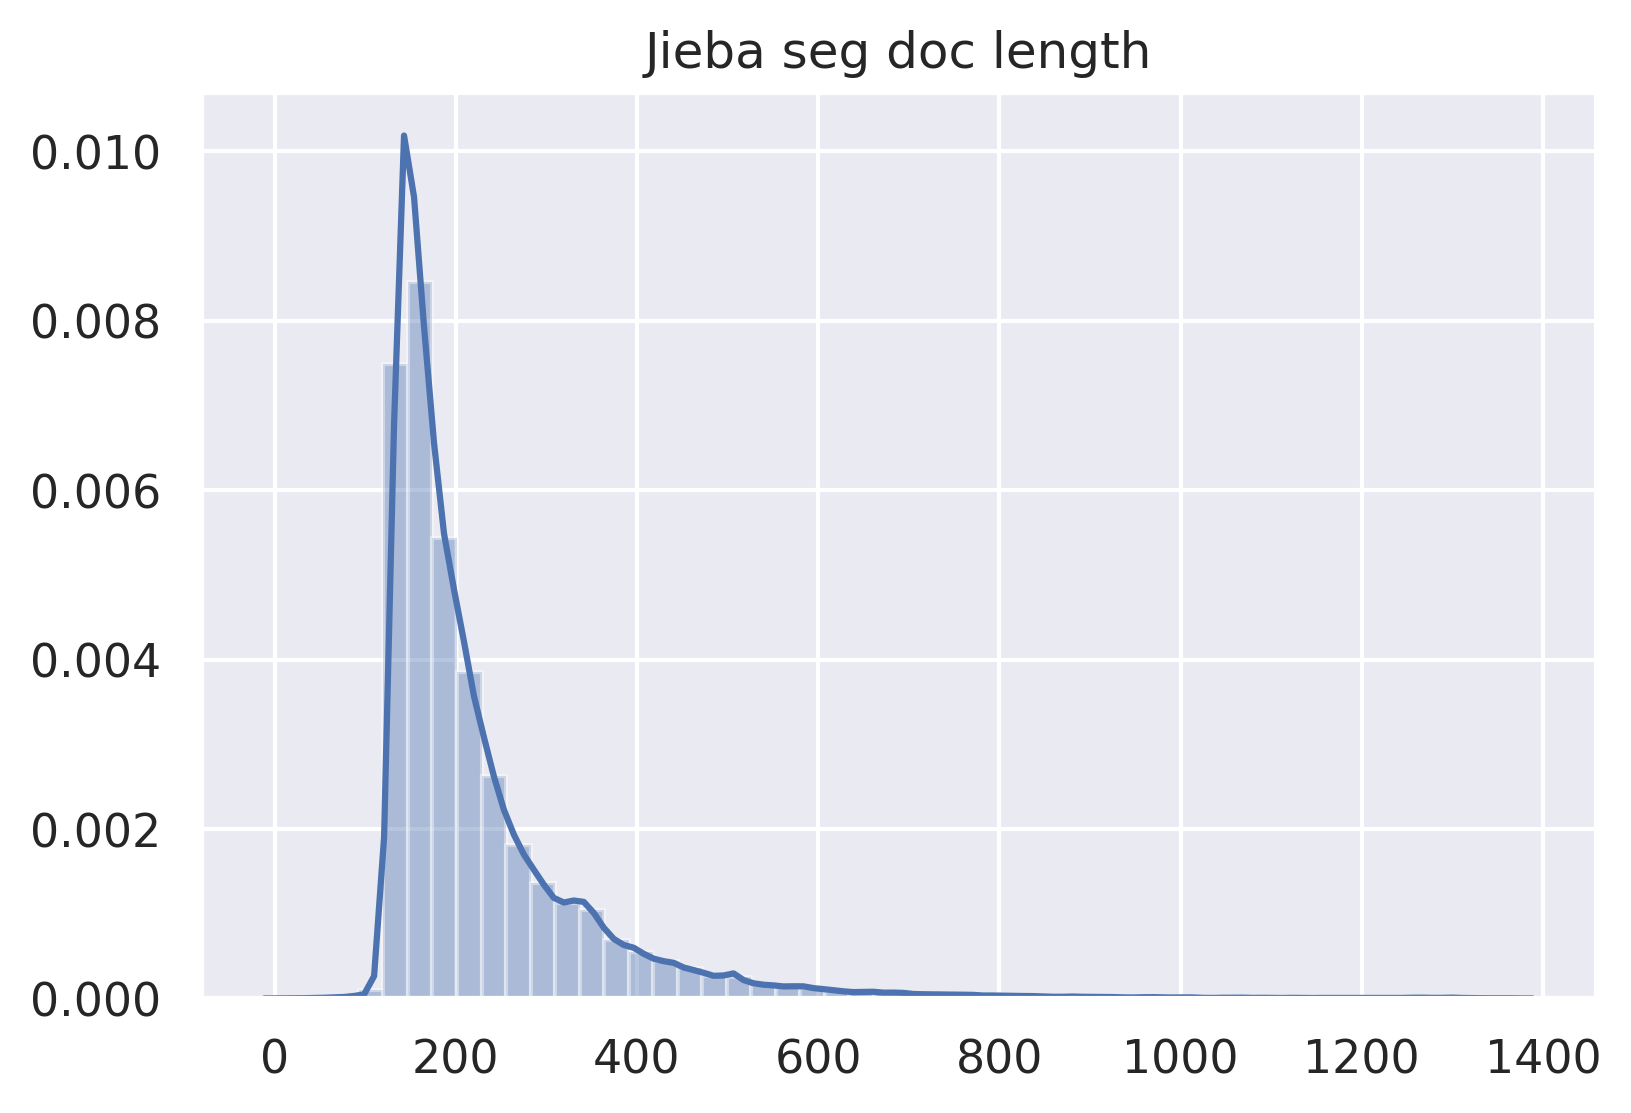

In [70]:
import pickle
base = '/home/gezi/temp/ai2018/sentiment/tfrecords/word.jieba.ft'
valid_infos = pickle.load(open(f'{base}/info.pkl', 'rb'))
lens = [len(valid_infos[key]['content']) for key in valid_infos]
sns.distplot(lens)
plt.title('Jieba seg doc length')#标题
plt.show()

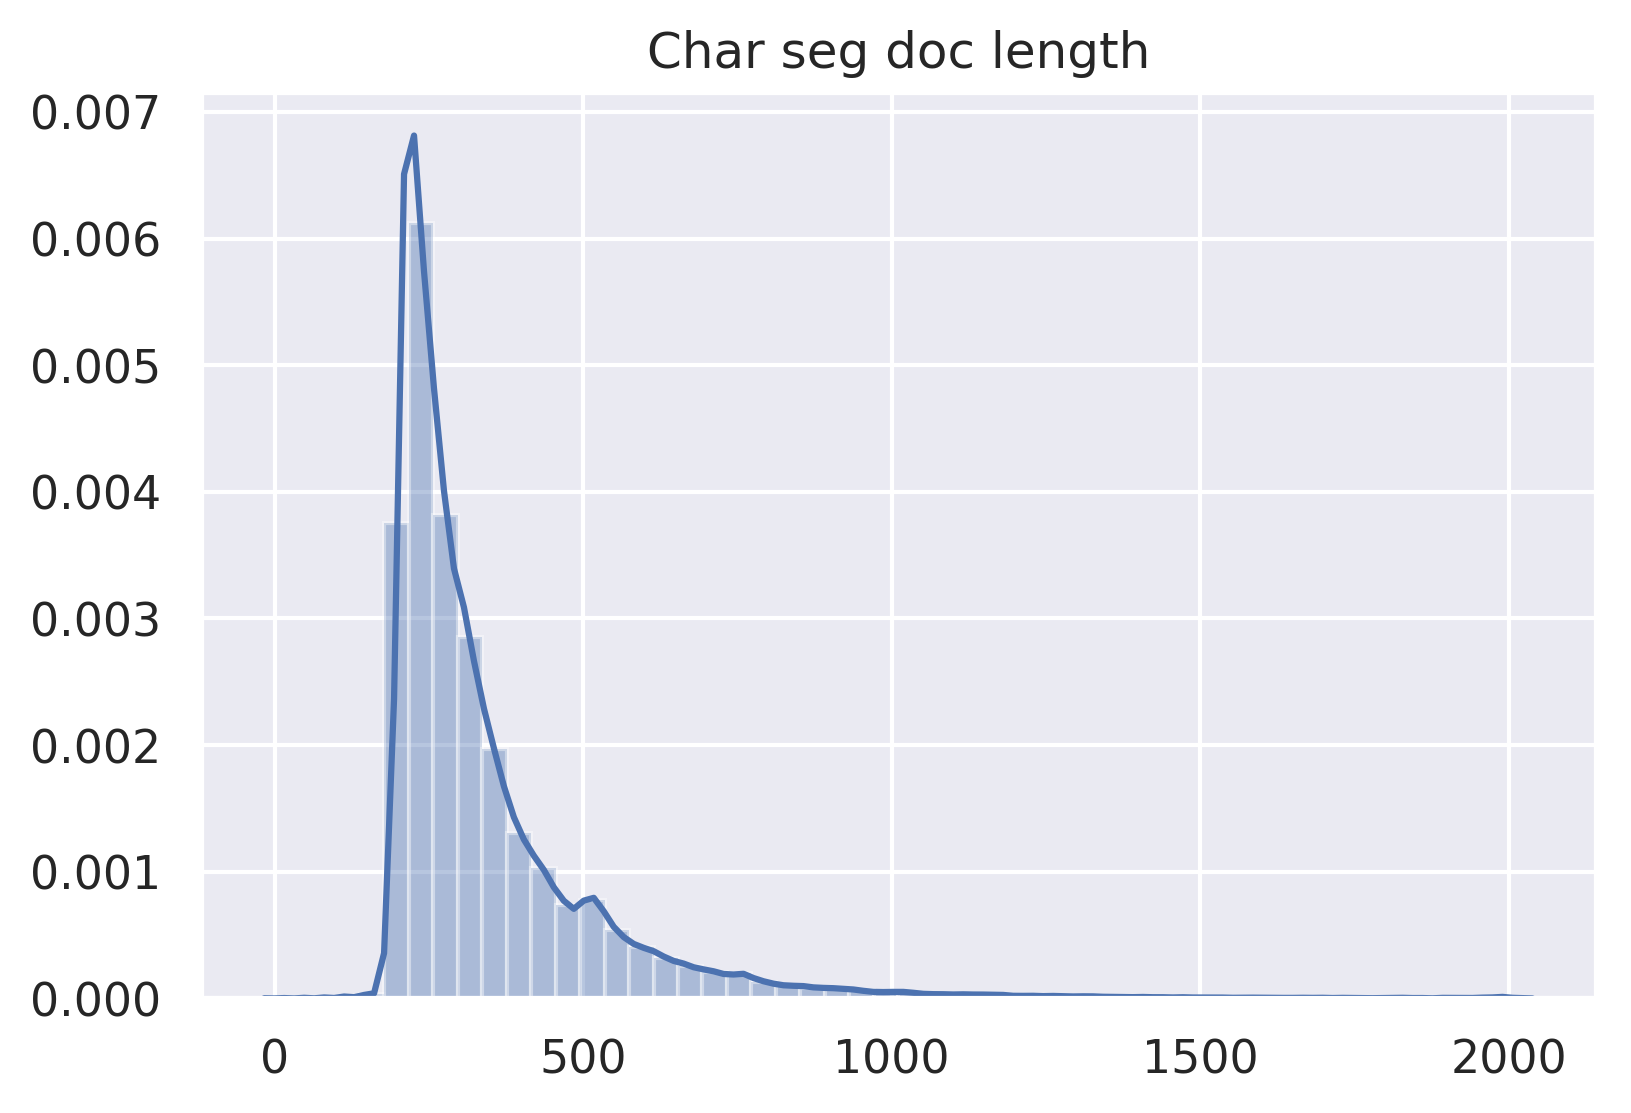

In [71]:
import pickle
base = '/home/gezi/temp/ai2018/sentiment/tfrecords/char.ft'
valid_infos = pickle.load(open(f'{base}/info.pkl', 'rb'))
lens = [len(valid_infos[key]['content']) for key in valid_infos]
sns.distplot(lens)
plt.title('Char seg doc length')#标题
plt.show()

In [72]:
len([x for x in lens if x > 512]) / len(lens)

0.12724761904761905

In [34]:
import random
from pyecharts import HeatMap

x_axis = [
    "12a", "1a", "2a", "3a", "4a", "5a", "6a", "7a", "8a", "9a", "10a", "11a",
    "12p", "1p", "2p", "3p", "4p", "5p", "6p", "7p", "8p", "9p", "10p", "11p"]
y_axis = [
    "Saturday", "Friday", "Thursday", "Wednesday", "Tuesday", "Monday", "Sunday"]
data = [[i, j, random.randint(0, 50)] for i in range(24) for j in range(7)]
heatmap = HeatMap()
heatmap.add(
    "热力图直角坐标系",
    x_axis,
    y_axis,
    data,
    is_visualmap=True,
    visual_text_color="#000",
    visual_orient="horizontal",
)
heatmap

In [35]:
from pyecharts import Radar

schema = [
    ("销售", 6500), ("管理", 16000), ("信息技术", 30000), ("客服", 38000), ("研发", 52000), ("市场", 25000)]
v1 = [[4300, 10000, 28000, 35000, 50000, 19000]]
v2 = [[5000, 14000, 28000, 31000, 42000, 21000]]
radar = Radar()
radar.config(schema)
radar.add("预算分配", v1, is_splitline=True, is_axisline_show=True)
radar.add("实际开销", v2, label_color=["#4e79a7"], is_area_show=False)
#radar.show_config()
radar

In [100]:
dir_ = '/home/gezi/temp/ai2018/sentiment/model/v12/0/word.jieba.ft/'

In [109]:
import glob
l = glob.glob(f'{dir_}/*/epoch/*.valid.metrics') 
l2 = glob.glob(f'{dir_}/*/ckpt/*.valid.metrics') 
l = l + l2
l[0]

'/home/gezi/temp/ai2018/sentiment/model/v12/0/word.jieba.ft/tf.word.baseline.gru.hidden100/epoch/model.ckpt-1.00-3282.valid.metrics'

In [117]:
def get_name_epoch(path):
  l = path.split('/')
  return l[-3], int(float(l[-1].rsplit('.', 2)[0].split('-')[1]))

In [118]:
get_name_epoch(l[0])

('tf.word.baseline.gru.hidden100', 1)

In [126]:
def get_infos(l):
  f1 = {}
  loss = {}
  for path in l:
    name, epoch = get_name_epoch(path)
    if name not in f1:
      f1[name] = [0] * 100
      loss[name] = [0] * 100
        
    for line in open(path):
      l = line.rstrip().split('\t')
      if l[0] == 'adjusted_f1/mean':
        f1[name][epoch] = float(l[1])
      if l[0] == 'loss/mean':
        loss[name][epoch] = float(l[1])
    
  for key in f1:
    f1[key] = [x for x in f1[key] if x != 0]
    loss[key] = [x for x in loss[key] if x != 0]
  return f1, loss

In [127]:
f1, loss = get_infos(l)

In [130]:
f1.keys()

dict_keys(['tf.word.baseline.gru.hidden100', 'tf.word.baseline.gru.hidden200', 'tf.word.baseline.lstm.hidden100', 'tf.word.baseline.gru.hidden400', 'tf.word.baseline.lstm.hidden200', 'tf.word.baseline.lstm.hidden400', 'tf.word.baseline.lstm.hidden400.unkaug', 'tf.word.baseline.gru.hidden400.unkaug', 'tf.word.baseline.lstm.hidden400.attention_pooling', 'tf.word.baseline.lstm.hidden400.max_pooling', 'tf.word.baseline.lstm.hidden400.max_pooling.unkaug', 'torch.word.baseline.gru.hidden100', 'torch.word.baseline.lstm.hidden400', 'torch.word.baseline.gru.hidden200', 'torch.word.baseline.lstm.hidden100', 'torch.word.baseline.lstm.hidden400.unkaug', 'torch.word.baseline.lstm.hidden200', 'torch.word.baseline.gru.hidden400', 'torch.word.baseline.gru.hidden400.unkaug', 'torch.word.baseline.lstm.hidden400.attention_pooling', 'torch.word.baseline.lstm.hidden400.max_pooling'])

In [187]:
import pyecharts
line = pyecharts.Line("Adjusted F1", 'hidden_size', title_pos='center')
def add(key):
  line.add(key, [x + 1  for x in range(len(f1[key]))], f1[key],legend_pos='65%', legend_top='45%', legend_orient='vertical')
add('tf.word.baseline.gru.hidden100')
add('tf.word.baseline.gru.hidden200')
line
#line.add("最低气温", cities, lows, mark_line=['average'], is_smooth=True)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('epoch')
ax.set_title('Adjusted F1')
#var.plot(kind='line')
sns.pointplot(x="sepal_length",y="species",data=iris)
plt.show()

In [151]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
fmri = sns.load_dataset("fmri")
ax = sns.lineplot(x="timepoint", y="signal", data=fmri)

URLError: <urlopen error unknown url type: https>

In [152]:
sns.__version__

'0.9.0'

In [264]:
words = ['<S>', '这家', '烧烤店', '在', '汉广', '街上', '，', '临近', '木兰', '街', 'SPACE', '位置', '来说', '还', '不错', '，', '环境', '一般', '，', 'SPACE', '羊排', '烤', '的', '还行', '，', '生', '蚝', '一般', 'SPACE', '总体', '来说', '偶尔', '吃', '下', '还', '可以', '吧', '</S>']
alpha = [0.00056962966,0.23827146,0.19244207,0.11011295,0.17349437,0.11852508,0.046037722,0.05955463,0.017608836,0.012202048,0.0028137492,0.0002055885,0.00036370466,0.00025330443,0.00029033062,0.000363468,2.7266471e-05,0.00018710292,0.00032836615,0.001367057,0.00075813156,0.00045154025,0.00021950406,0.00029479177,0.0006688184,0.0013774327,0.0005269423,0.0004646081,0.00067773816,0.000642519,0.00056342455,0.00033431596,0.0002380904,0.0004108409,0.00061148417,0.0011762715,0.0015607427,0.014004141,0.00896384,2.1429629e-05,0.37175584,0.07558788,0.33509356,0.1697859,0.0038804545,0.02001661,0.007757798,0.006119119,0.00013767781,4.334247e-06,1.0210862e-05,5.279099e-06,4.277094e-06,6.740322e-06,5.797643e-07,4.09565e-06,7.305827e-06,3.0841245e-05,8.720799e-05,5.405498e-05,1.5832167e-05,2.1332751e-05,2.9347422e-05,0.00018563062,6.511817e-05,2.4849227e-05,1.7997092e-05,2.3965602e-05,2.3201446e-05,1.4656879e-05,1.4404182e-05,1.9649635e-05,2.3715076e-05,3.687569e-05,3.490308e-05,0.00011355923,0.0005842279,0.029999776,1.7293179e-06,0.058603156,0.48592827,0.40500358,0.00088649447,0.010413157,0.0033831166,0.0051128203,1.609663e-05,2.6391604e-07,5.735476e-07,2.8675615e-07,1.4218736e-07,4.560604e-07,1.630011e-08,2.394288e-07,5.014799e-07,1.9691922e-06,7.396251e-06,5.79215e-06,1.341706e-06,1.0409632e-06,1.8008423e-06,1.9817078e-05,6.9998982e-06,1.504122e-06,1.0326239e-06,1.2741053e-06,1.6307731e-06,1.2316684e-06,1.0689273e-06,1.4129797e-06,1.329779e-06,1.852888e-06,2.0678915e-06,4.650104e-06,1.37295265e-05,0.00025052283,0.002406888,7.102476e-08,0.49947086,0.47508273,0.0003134499,0.01335174,0.0022750262,0.006826716,5.732753e-06,9.009489e-08,2.4423855e-07,1.2207312e-07,4.3175923e-08,7.5488174e-08,2.0259927e-09,2.4459881e-08,4.5484725e-08,1.09136735e-07,2.173289e-07,1.7534026e-07,5.1412126e-08,3.722629e-08,6.946574e-08,3.491876e-07,1.4973494e-07,6.18174e-08,4.0161186e-08,4.521847e-08,7.1870744e-08,8.006812e-08,6.239435e-08,7.5538075e-08,5.8768606e-08,8.5548855e-08,9.72977e-08,1.2412634e-07,1.1170426e-08,5.734933e-07,1.0305622e-05,0.00025791547,3.6675576e-11,0.9922611,3.2401495e-06,0.00080826605,0.00046556682,0.006192976,6.4999284e-08,7.688091e-11,2.6033345e-10,1.5389628e-10,2.4369395e-11,5.7068135e-11,1.3758031e-12,4.209913e-12,1.1131891e-11,3.5245674e-11,1.3024166e-10,9.062795e-11,2.465463e-11,1.02834624e-11,3.036038e-11,3.9441242e-10,2.7160954e-10,3.6255554e-11,1.9610213e-11,2.3564236e-11,4.5669964e-11,5.880638e-11,5.565829e-11,5.970238e-11,2.4837814e-11,2.660082e-11,3.3746998e-11,4.3454084e-11,5.8468173e-09,2.2263244e-07,6.5809013e-06,0.00018795805,0.76023954,2.8099684e-11,1.4163233e-05,0.002846326,0.0016716388,0.23503284,6.9263376e-07,5.534576e-10,1.0025111e-09,6.0198035e-10,7.0297296e-11,2.0708672e-10,2.4979498e-12,4.421643e-12,8.175089e-12,2.1680647e-11,5.799486e-11,4.5608902e-11,1.5915207e-11,5.404486e-12,1.4014908e-11,1.6539643e-10,1.6201743e-10,1.6372405e-11,1.1798698e-11,1.2507246e-11,3.2388096e-11,4.5429528e-11,3.3704383e-11,5.133505e-11,2.0461466e-11,1.8092828e-11,2.3883263e-11,2.5419576e-11,0.000102959624,0.00023068195,0.00065305067,0.005622172,0.112546965,0.6421059,1.2739303e-06,0.11983475,0.016419545,0.09562227,0.0062783537,0.00031939067,8.294289e-05,5.577999e-05,4.0655217e-05,4.9371505e-05,1.2822981e-06,3.535012e-06,4.506455e-06,5.977631e-06,1.5159782e-06,1.0197052e-06,5.2390953e-07,4.1203393e-07,1.3586782e-06,1.8026171e-06,1.104013e-06,8.0996637e-07,1.2823543e-06,5.020124e-07,7.217179e-07,5.035161e-07,3.026199e-07,5.810576e-07,6.3050356e-07,6.862109e-07,1.4327063e-06,3.2030607e-06,6.1817116e-07,5.52283e-06,3.5603553e-05,0.0011115113,0.13030563,0.59892017,0.0005561896,5.9126988e-09,0.034148283,0.23482789,8.55557e-05,9.062598e-07,9.623369e-07,8.08868e-07,1.1246144e-07,7.957441e-08,2.3227656e-10,6.326746e-10,2.0848088e-09,1.1778244e-08,4.6939906e-08,4.1757737e-08,1.1344107e-08,4.418274e-09,5.664094e-09,3.4855375e-08,1.6811294e-08,3.51414e-09,2.955254e-09,3.5292602e-09,6.02612e-09,7.9421385e-09,3.524417e-09,7.3049273e-09,5.940472e-09,5.283536e-09,5.933033e-09,8.017111e-09,1.2274532e-07,1.4374442e-06,7.767993e-06,0.00012718725,0.050404813,0.23621525,5.1177896e-05,0.022932429,3.970699e-09,0.69017303,8.4768624e-05,3.340572e-07,6.4330084e-07,8.0959467e-07,9.161604e-08,2.8530582e-08,5.167704e-10,5.1855653e-10,7.4695783e-10,3.6470416e-09,4.1953356e-08,5.2269392e-08,1.4626351e-08,6.9932806e-09,4.1461248e-09,3.4761328e-08,2.870443e-08,3.991451e-09,1.9197202e-09,2.8457632e-09,4.2172927e-09,6.715207e-09,5.3000218e-09,8.824364e-09,6.7193846e-09,5.5734453e-09,3.927891e-09,3.5266383e-09,2.4284148e-09,3.2371084e-08,3.351724e-07,1.08964405e-05,0.019142782,0.9482213,8.509342e-06,0.004502425,0.01970487,1.13365935e-10,0.008341579,3.372035e-05,1.7191984e-05,1.6077163e-05,3.7923402e-07,2.8157926e-08,3.6709604e-11,1.2988788e-11,2.3699513e-11,1.1466573e-10,1.3834579e-09,2.6459326e-09,1.1640511e-09,2.5498822e-10,8.258984e-11,5.755155e-10,8.226413e-10,6.6425865e-11,5.574288e-11,6.56719e-11,1.5091743e-10,2.1214397e-10,2.0070644e-10,3.918063e-10,2.3624788e-10,8.9983625e-11,7.041281e-11,5.909673e-11,2.9342942e-13,3.816457e-13,5.529312e-13,4.794734e-12,1.0527923e-10,1.464242e-09,2.927596e-10,8.5955626e-10,1.2681751e-09,4.3709592e-06,5.940336e-14,0.99659014,0.002407311,0.0009862544,1.1733425e-05,1.3036882e-07,1.168117e-09,9.479672e-11,1.9125645e-12,2.6634387e-12,2.862755e-12,8.134662e-12,1.943177e-11,8.025441e-12,2.2627118e-13,7.937156e-14,6.675096e-13,7.8228147e-13,3.8122446e-13,1.6369386e-13,1.9864958e-13,1.6721464e-13,1.271253e-13,1.8980347e-13,3.591711e-13,1.1465269e-13,1.5297664e-13,1.9864581e-13,1.9090624e-21,1.0698295e-21,8.072447e-22,6.709731e-21,1.1088079e-20,1.0418318e-19,1.3261445e-18,8.1073936e-19,4.4500844e-19,1.5733488e-15,8.8740165e-08,5.289501e-21,0.9677862,0.03219641,1.727184e-05,6.2119726e-11,5.1860495e-12,5.6674034e-15,2.962147e-18,8.5992197e-19,1.0979162e-18,1.3651864e-17,1.5760873e-16,4.4750782e-17,1.847563e-20,3.1337685e-22,2.0297159e-20,8.31997e-20,2.5517163e-20,3.9165312e-20,5.588407e-20,5.3577994e-20,4.108374e-20,8.58008e-20,4.677313e-19,3.438494e-20,3.2868594e-20,1.5846989e-20,3.4578484e-21,2.5804602e-21,1.7961542e-21,1.862313e-20,3.8441726e-20,1.9321318e-19,3.525998e-19,8.814353e-19,8.773962e-19,8.2128214e-16,2.1946744e-10,0.99086326,5.4156302e-21,0.00913473,1.9548231e-06,8.48706e-13,1.2619545e-15,2.0053734e-16,7.469352e-19,4.8988004e-19,2.643059e-18,3.2562325e-17,4.0833606e-16,3.8085653e-16,3.6473867e-20,1.6562609e-21,4.2235277e-20,8.905602e-20,1.78092e-20,3.2876074e-19,1.2054503e-18,2.5703841e-18,2.845547e-18,5.31756e-18,4.0354013e-17,1.5239367e-18,1.6654237e-19,4.4599986e-20,5.623665e-20,3.1154006e-20,2.0970455e-20,2.173599e-19,5.3066593e-19,2.709261e-18,5.5373493e-18,1.7300597e-17,2.5785188e-17,1.7934777e-14,2.099651e-09,0.76977164,0.2133123,1.2646466e-19,0.016916016,1.2163226e-10,5.338143e-14,2.4294885e-14,2.9036445e-17,1.5209011e-17,7.3545164e-17,1.2261283e-15,1.8718496e-14,6.751753e-14,2.769217e-18,9.222329e-20,1.9285259e-18,6.6472404e-18,4.6339035e-19,3.3178357e-18,1.0214899e-17,3.8364167e-17,8.6286955e-17,2.953718e-16,6.1174765e-15,3.055371e-16,1.0302205e-17,2.067397e-18,3.7098298e-18,1.4527403e-18,5.9846605e-19,4.4247152e-18,4.83639e-18,1.8209155e-17,2.3228656e-16,1.3844297e-16,1.679415e-16,2.4348833e-14,1.4376964e-09,0.02376716,0.0026273136,0.9736041,7.278694e-18,1.4054018e-06,4.708772e-11,7.3186866e-11,2.4593549e-14,3.1615789e-15,3.724055e-16,2.9021134e-15,1.8842468e-14,9.335718e-13,6.446801e-16,4.266487e-18,1.6913079e-17,1.421755e-16,3.6124374e-17,3.3546108e-17,7.25151e-17,4.6875022e-17,8.5167396e-17,4.6428364e-16,9.183962e-15,1.2259205e-14,1.2111107e-15,3.1407095e-16,1.5957296e-13,7.8659505e-14,6.5952784e-14,2.6579986e-13,3.8913686e-13,1.8430472e-12,9.692066e-12,3.3656843e-12,1.796926e-12,6.2116035e-11,5.488433e-07,0.0029369763,3.919168e-05,0.00024052778,0.048287272,2.5008383e-13,0.9358694,0.012626075,4.0780908e-08,3.4504286e-10,3.739897e-12,4.583258e-12,2.911014e-11,2.8075978e-10,7.638843e-11,2.320384e-12,6.0284326e-11,4.154183e-10,1.0980454e-11,5.5087805e-12,8.340005e-12,1.0786532e-11,2.1146002e-12,3.0562423e-12,5.34347e-12,1.4284139e-11,1.9318625e-11,9.441815e-12,3.578352e-30,2.0224766e-30,7.0463e-31,2.1324321e-30,2.8043127e-30,6.645526e-30,7.5247136e-29,2.9367426e-30,9.7291955e-30,2.4207089e-29,1.4700144e-24,7.32941e-20,1.7419743e-23,3.1554995e-23,4.8361677e-22,2.797537e-16,7.4756174e-29,1.0,5.796056e-18,5.6403886e-24,3.3980422e-27,2.355938e-27,4.9441973e-27,1.9837105e-26,8.891081e-27,2.6423025e-27,1.281681e-23,9.893128e-21,8.441095e-26,1.0200132e-26,1.3410474e-27,4.4987927e-26,2.285597e-27,7.875976e-28,3.2659195e-28,1.0225606e-27,1.5474094e-27,2.133306e-27,2.4554737e-29,1.4287508e-29,1.0350197e-29,2.5744926e-29,8.581139e-30,1.1763259e-29,2.074401e-28,7.9991115e-30,9.7628045e-30,8.565114e-30,1.1929672e-25,8.009674e-23,2.7681735e-24,1.4361266e-23,7.5166787e-22,3.7742427e-18,1.0,7.4756174e-29,2.3043506e-11,4.8880862e-20,3.6923008e-26,1.9506244e-27,3.834758e-27,1.6376807e-25,1.5721321e-26,4.523519e-27,3.589875e-24,5.2720973e-18,9.844844e-25,1.9093683e-26,5.722694e-27,5.051575e-25,2.2240414e-26,4.25703e-27,1.6890652e-27,1.5315073e-26,6.83351e-27,8.5979614e-27,1.8700965e-18,1.1059938e-18,9.407562e-19,2.077563e-18,9.846713e-19,9.438224e-19,1.1475938e-17,1.1438781e-18,6.102778e-19,6.7819603e-19,1.04448605e-16,1.8167298e-15,4.474374e-16,7.4485663e-16,1.09614246e-14,5.2901704e-13,2.5152661e-07,0.99999976,3.244131e-18,4.1787976e-10,1.0121078e-15,1.776025e-17,1.3512367e-17,3.9422382e-17,1.6191577e-16,1.4992817e-17,8.0812065e-17,2.2400791e-14,4.284392e-15,2.5101155e-17,2.2739721e-17,5.758526e-17,2.0208621e-17,6.738716e-18,1.7463363e-18,6.0785243e-18,2.0012308e-17,4.262462e-17,3.065944e-09,1.8386007e-09,1.4547331e-09,1.96305e-09,1.2277191e-09,9.856913e-10,5.994509e-09,2.544866e-09,1.1733942e-09,1.2921746e-09,5.727995e-08,2.0768951e-07,1.1556091e-07,1.5363932e-07,5.5490875e-07,1.7626135e-06,9.639003e-05,0.83533746,0.16455956,1.2775272e-09,2.8660208e-06,1.1092947e-07,5.983272e-08,6.3564045e-08,5.873625e-08,1.18411e-08,1.7065597e-08,1.1536864e-07,2.5275992e-07,1.0919296e-08,8.848485e-09,9.064647e-09,5.9487895e-09,3.1149086e-09,2.0599953e-09,2.316336e-09,3.4457e-09,1.1947227e-08,7.016914e-08,2.1455338e-07,2.2549166e-07,1.6132492e-07,1.872262e-07,1.0881313e-07,6.2739495e-08,4.1855273e-07,5.570486e-07,6.433942e-07,2.5407785e-06,1.0943319e-05,2.5730675e-05,3.066049e-05,2.6974683e-06,7.884383e-07,2.3964888e-06,2.6040188e-05,1.6448324e-05,0.000118277705,5.272222e-08,0.74248624,0.20894547,0.04758494,4.8396392e-05,0.00016051838,0.0004271026,8.690043e-05,2.9389314e-06,3.8319786e-06,9.803443e-07,1.611886e-06,4.3683594e-06,2.2196218e-06,4.1439453e-06,9.143611e-07,1.1047864e-07,7.87479e-08,9.768357e-10,3.1084126e-09,4.1274526e-09,3.0422087e-09,3.0451057e-09,2.0001625e-09,9.863843e-10,8.7029886e-09,1.6221748e-08,2.8761622e-08,1.6875055e-07,3.1804957e-06,7.4094164e-06,1.1947676e-05,4.9133547e-07,2.2584258e-08,3.8835946e-08,3.2154645e-08,6.746321e-09,1.070025e-07,0.01735449,1.232302e-09,0.8129567,0.16959338,3.6816334e-06,1.5660728e-05,3.9425133e-05,1.1943745e-05,5.2202793e-08,1.10336074e-07,2.6587418e-08,5.5296585e-08,2.1884267e-07,1.567389e-07,4.610065e-07,8.042584e-08,4.8214055e-09,1.4938809e-09,8.223452e-12,1.57663e-11,1.6557202e-11,1.5447558e-11,1.4345827e-11,1.20868975e-11,8.776373e-12,4.0943842e-11,7.860914e-11,2.1912576e-10,6.9808017e-09,6.358712e-07,1.6090587e-06,3.1586842e-06,5.524442e-08,2.4840638e-09,1.4114085e-09,1.0946993e-09,8.8886926e-11,9.994764e-10,8.4575244e-05,0.014078431,2.1340473e-11,0.985819,6.357663e-07,2.55357e-07,2.424988e-06,9.162883e-06,5.1537064e-09,1.448699e-08,2.7810112e-09,6.507456e-09,2.3064729e-08,1.509708e-08,6.3589816e-08,5.6321627e-09,1.5285515e-10,2.965273e-11,1.1089587e-11,2.1331627e-11,1.2898888e-11,1.1231355e-11,6.008341e-12,4.121403e-12,6.9307303e-12,1.6012499e-11,3.774037e-11,4.819808e-11,2.89501e-09,1.8129164e-07,1.5069697e-06,1.1440344e-05,2.7484386e-06,2.405695e-08,5.686216e-09,4.6943374e-08,2.6039687e-10,1.0661875e-09,1.9340512e-05,0.002949062,0.9898864,2.142852e-11,6.952377e-05,1.4036071e-06,2.1021933e-05,0.007035235,6.855986e-08,1.10029525e-07,2.1374749e-08,5.6830963e-08,1.8738479e-07,9.0870024e-08,1.0741926e-06,4.557232e-07,2.1237667e-09,1.4232503e-10,3.4292432e-07,3.9997968e-07,3.0414694e-07,2.856561e-07,2.4177584e-07,1.4567044e-07,3.1149676e-07,2.797869e-07,3.0497065e-07,2.1277776e-07,1.112502e-06,1.0201583e-06,1.9670517e-06,6.3954285e-06,2.5868607e-05,8.921226e-05,3.4736888e-05,6.142221e-05,1.4577176e-05,1.3428226e-05,0.00026810315,0.00087258144,0.008701139,0.9475971,2.920671e-07,0.0012751985,0.0034734937,0.037124276,0.00037189617,3.1271386e-05,7.3643237e-06,4.4217322e-06,3.4571763e-06,2.3642333e-06,4.7481353e-06,7.02659e-06,1.6763438e-06,1.0072725e-06,9.142772e-07,3.275177e-06,4.33276e-06,1.8588695e-06,4.066061e-06,2.2254842e-06,5.350048e-07,2.228868e-06,3.3100062e-06,1.919439e-06,5.051888e-07,2.240021e-08,1.1563264e-07,2.7572221e-07,2.2162382e-07,3.5081166e-06,1.3363977e-05,2.2878588e-05,1.7473725e-06,3.5044654e-06,0.0011511474,0.004805014,0.0045242193,0.024765853,0.0016508023,3.7809406e-07,0.66997474,0.29277375,0.00014908928,3.8891263e-05,1.2536133e-05,2.7379161e-05,2.4197398e-05,1.2376467e-05,1.0161107e-05,6.655389e-06,1.1970044e-06,7.06273e-07,5.76045e-10,1.8922295e-09,2.5205953e-09,1.3128032e-09,4.6116284e-09,3.5904306e-09,5.396527e-10,1.7705233e-09,4.5016137e-09,4.5187063e-09,6.9973356e-09,2.3894942e-09,4.8563793e-09,9.49604e-09,1.4469566e-09,1.501084e-07,0.0001067626,2.9903284e-05,1.5511866e-08,8.3183584e-09,5.044577e-06,1.9922429e-05,7.076066e-05,0.0006108953,7.405769e-06,0.00110343,6.227106e-10,0.99803954,4.3391688e-06,7.935594e-07,1.1087612e-07,3.9320582e-07,2.4765455e-07,8.6318465e-08,9.539724e-08,4.5446654e-08,5.448366e-09,1.762965e-09,1.1236118e-11,1.597425e-11,1.1982043e-11,1.1990112e-11,1.3618205e-11,8.02663e-12,8.758779e-12,8.18758e-12,1.38479705e-11,8.071921e-12,1.8141509e-10,2.1668482e-10,2.2653565e-10,7.240931e-10,2.69087e-10,2.2883489e-08,0.0018230929,0.9715353,9.512336e-08,1.2440559e-09,2.2706535e-08,1.3351979e-07,5.9149406e-06,0.004522814,1.7510462e-06,1.06673015e-05,0.022079222,1.3775972e-11,2.0260382e-05,4.0441677e-07,2.7205985e-08,3.8118753e-07,6.549246e-08,1.0575886e-08,1.4019648e-08,2.1879268e-08,1.0214448e-09,1.5301586e-10,7.9259564e-07,5.5946106e-07,3.9778607e-07,3.7668596e-07,3.5619487e-07,2.797144e-07,6.705708e-07,3.329591e-07,3.2207248e-07,3.2755864e-07,4.275156e-06,3.2136602e-06,2.1906733e-06,2.4409565e-06,3.306197e-06,2.9249399e-05,0.0007522014,0.0087729,0.0008797787,0.00013180148,3.7134538e-05,2.8220093e-05,0.00016087847,0.0021313757,0.00084824505,0.00026268107,0.0046419725,0.97973275,6.6616565e-07,0.0011143922,0.00017982941,0.00017400367,5.3010506e-05,1.7058306e-05,1.1895007e-05,1.018429e-05,5.54423e-06,4.24977e-06,1.8917832e-09,1.875651e-09,1.235688e-09,1.0677866e-09,1.0775931e-09,7.465152e-10,6.60918e-10,1.0010973e-09,1.2020158e-09,9.715728e-10,4.6216693e-09,1.2418389e-08,1.0181442e-07,4.400107e-08,7.729778e-09,3.6944364e-08,2.2884268e-07,4.2837192e-07,1.29769795e-08,1.4335169e-08,1.2190112e-07,1.5016847e-07,1.1385522e-06,8.611822e-06,1.7957377e-07,1.7251645e-07,2.1373298e-06,4.9236285e-05,2.8056545e-06,1.6771751e-09,0.039142426,0.85889846,0.07867783,0.007930084,0.013777261,0.001503545,4.651945e-06,3.0013294e-07,8.679484e-12,9.5005835e-12,8.275011e-12,8.8795854e-12,1.0927078e-11,1.01142645e-11,4.9713246e-12,8.943393e-12,9.320026e-12,1.16817285e-11,2.9344513e-11,9.270936e-11,1.9532174e-09,7.0878614e-10,8.742292e-11,2.926382e-10,1.5741544e-10,6.7174516e-10,6.150888e-11,6.0778375e-11,1.6316809e-10,1.893256e-10,1.1435339e-09,8.753045e-09,2.2125879e-10,2.9094738e-10,1.5624353e-09,1.7329759e-08,2.3687998e-09,0.00020479516,8.775064e-12,0.9247954,0.06889133,0.003255076,0.002659362,0.0001938625,1.7665738e-07,5.4495986e-09,4.877323e-17,5.683882e-17,5.918853e-17,9.3684564e-17,1.3324966e-16,1.3435524e-16,3.2846257e-17,1.1162683e-16,1.4054335e-16,1.5551271e-16,2.3392737e-16,8.417624e-16,3.9442713e-14,2.5210089e-14,5.351874e-16,3.5843732e-15,5.0011133e-14,5.6156176e-13,1.4751315e-15,5.896545e-16,2.5407317e-15,3.72905e-15,2.5341073e-14,2.2039953e-13,1.2581373e-15,6.017804e-15,5.2474836e-14,2.2995043e-12,2.1706688e-14,4.2558003e-08,8.758166e-06,8.310321e-17,0.991585,0.007393605,0.0009917651,2.0899675e-05,2.8517674e-10,1.5501639e-12,3.3372264e-17,5.3667498e-17,4.9352626e-17,7.014102e-17,1.2116878e-16,9.576833e-17,1.8966552e-17,4.7592498e-17,1.06573116e-16,1.413562e-16,1.7086689e-16,6.201437e-16,4.19521e-14,5.4476863e-14,9.342366e-16,6.7511655e-16,2.4411225e-15,2.3753828e-14,4.9736504e-16,3.7178804e-16,6.61549e-15,1.4179217e-14,8.6294145e-14,6.981988e-13,9.450941e-16,5.1098317e-15,3.1753896e-14,3.7958243e-13,6.3535658e-15,3.7455106e-09,6.268322e-07,0.9526846,7.9843026e-17,0.04363453,0.0036443465,3.587275e-05,3.700375e-10,1.686358e-12,1.0500338e-15,1.3349383e-15,1.1895491e-15,1.5483782e-15,2.3699372e-15,2.6597074e-15,6.640416e-16,1.7986734e-15,3.2354793e-15,5.0316468e-15,4.651738e-15,2.3615592e-14,1.4295018e-12,3.400337e-12,9.286483e-14,1.7791947e-14,1.5338378e-14,8.2905044e-14,3.0241276e-15,3.5497393e-15,6.12924e-14,1.851744e-13,1.0299361e-12,6.173761e-12,1.1784975e-14,4.7656062e-14,2.0180819e-13,1.1176758e-12,3.7279885e-14,6.8836874e-09,5.400477e-07,0.12952684,0.7956364,1.4558657e-15,0.07385145,0.0009847146,9.20672e-09,4.1488084e-11,7.257639e-15,7.481911e-15,5.1988544e-15,5.59421e-15,4.5786713e-15,4.923097e-15,3.3461494e-15,6.792636e-15,1.1441043e-14,1.40892665e-14,4.0878433e-14,5.978398e-13,5.0377983e-11,3.2704342e-10,8.530603e-12,1.4445774e-13,2.953672e-14,1.5275774e-13,3.639423e-15,1.0901825e-14,5.3140223e-13,2.529257e-12,2.0145899e-11,3.389168e-10,1.099117e-13,1.8169553e-13,1.0357444e-12,6.880467e-12,1.2072176e-13,5.5537658e-08,2.0489447e-06,0.080685236,0.30859277,0.34295788,6.7608772e-15,0.2677615,3.6808146e-07,5.747799e-10,5.038738e-14,4.1988677e-14,2.6144565e-14,2.939081e-14,1.7698027e-14,1.5711285e-14,1.3143731e-14,2.1804473e-14,3.425023e-14,1.9368128e-14,4.709555e-14,1.5862116e-13,6.866342e-12,5.89524e-11,4.1097438e-11,1.3937188e-12,3.3377104e-13,4.9989396e-12,4.5720026e-14,4.4242347e-14,4.2318587e-13,1.592524e-12,6.4398825e-12,5.189382e-10,5.870414e-13,4.295165e-13,1.7808295e-12,3.875407e-11,3.730402e-13,2.1874813e-08,5.390762e-07,0.0061366092,0.010963124,0.016504249,0.96638864,2.4400949e-14,6.782757e-06,6.976864e-09,7.899177e-09,4.6956123e-09,3.4474346e-09,3.9494434e-09,2.6527807e-09,2.4503903e-09,3.2423106e-09,2.8929046e-09,2.8519085e-09,1.7906558e-09,7.4243274e-09,1.7914733e-08,8.865819e-08,2.3485731e-07,4.7970326e-07,2.2270711e-07,5.96761e-08,2.635359e-07,1.778451e-08,7.775896e-09,6.0412684e-09,1.1279754e-08,2.0649958e-08,2.8573126e-07,1.6547164e-08,9.1272385e-09,2.5224532e-08,2.1376458e-07,2.399397e-08,7.996488e-06,5.803962e-05,0.009893259,0.01336141,0.01823168,0.1569582,0.80138767,2.8829898e-09,9.9814024e-05,5.175804e-05,1.115633e-05,5.661113e-06,3.6793253e-06,2.4944115e-06,1.9044995e-06,5.293385e-06,2.8546085e-06,1.8698552e-06,1.0974745e-06,7.040157e-06,6.3073435e-06,1.7338029e-05,3.4416622e-05,9.084225e-05,7.948477e-05,6.0078517e-05,0.00024213747,2.7661577e-05,1.9688425e-05,3.1445559e-06,2.5521867e-06,2.925329e-06,1.398309e-05,7.260699e-06,3.9326633e-06,5.9603453e-06,2.3384506e-05,1.3430654e-05,0.00037674676,0.0013074594,0.03927117,0.04446587,0.059995078,0.1789833,0.6019599,0.07288909,2.1053e-06]

In [265]:
alpha = np.reshape(alpha, [38, 38])

In [266]:
for i in range(38):
  print(alpha[i][i])

0.00056962966
2.1429629e-05
1.7293179e-06
7.102476e-08
3.6675576e-11
2.8099684e-11
1.2739303e-06
5.9126988e-09
3.970699e-09
1.13365935e-10
5.940336e-14
5.289501e-21
5.4156302e-21
1.2646466e-19
7.278694e-18
2.5008383e-13
7.4756174e-29
7.4756174e-29
3.244131e-18
1.2775272e-09
5.272222e-08
1.232302e-09
2.1340473e-11
2.142852e-11
2.920671e-07
3.7809406e-07
6.227106e-10
1.3775972e-11
6.6616565e-07
1.6771751e-09
8.775064e-12
8.310321e-17
7.9843026e-17
1.4558657e-15
6.7608772e-15
2.4400949e-14
2.8829898e-09
2.1053e-06


In [302]:
for i in range(38):
  alpha[i][i] = 0.

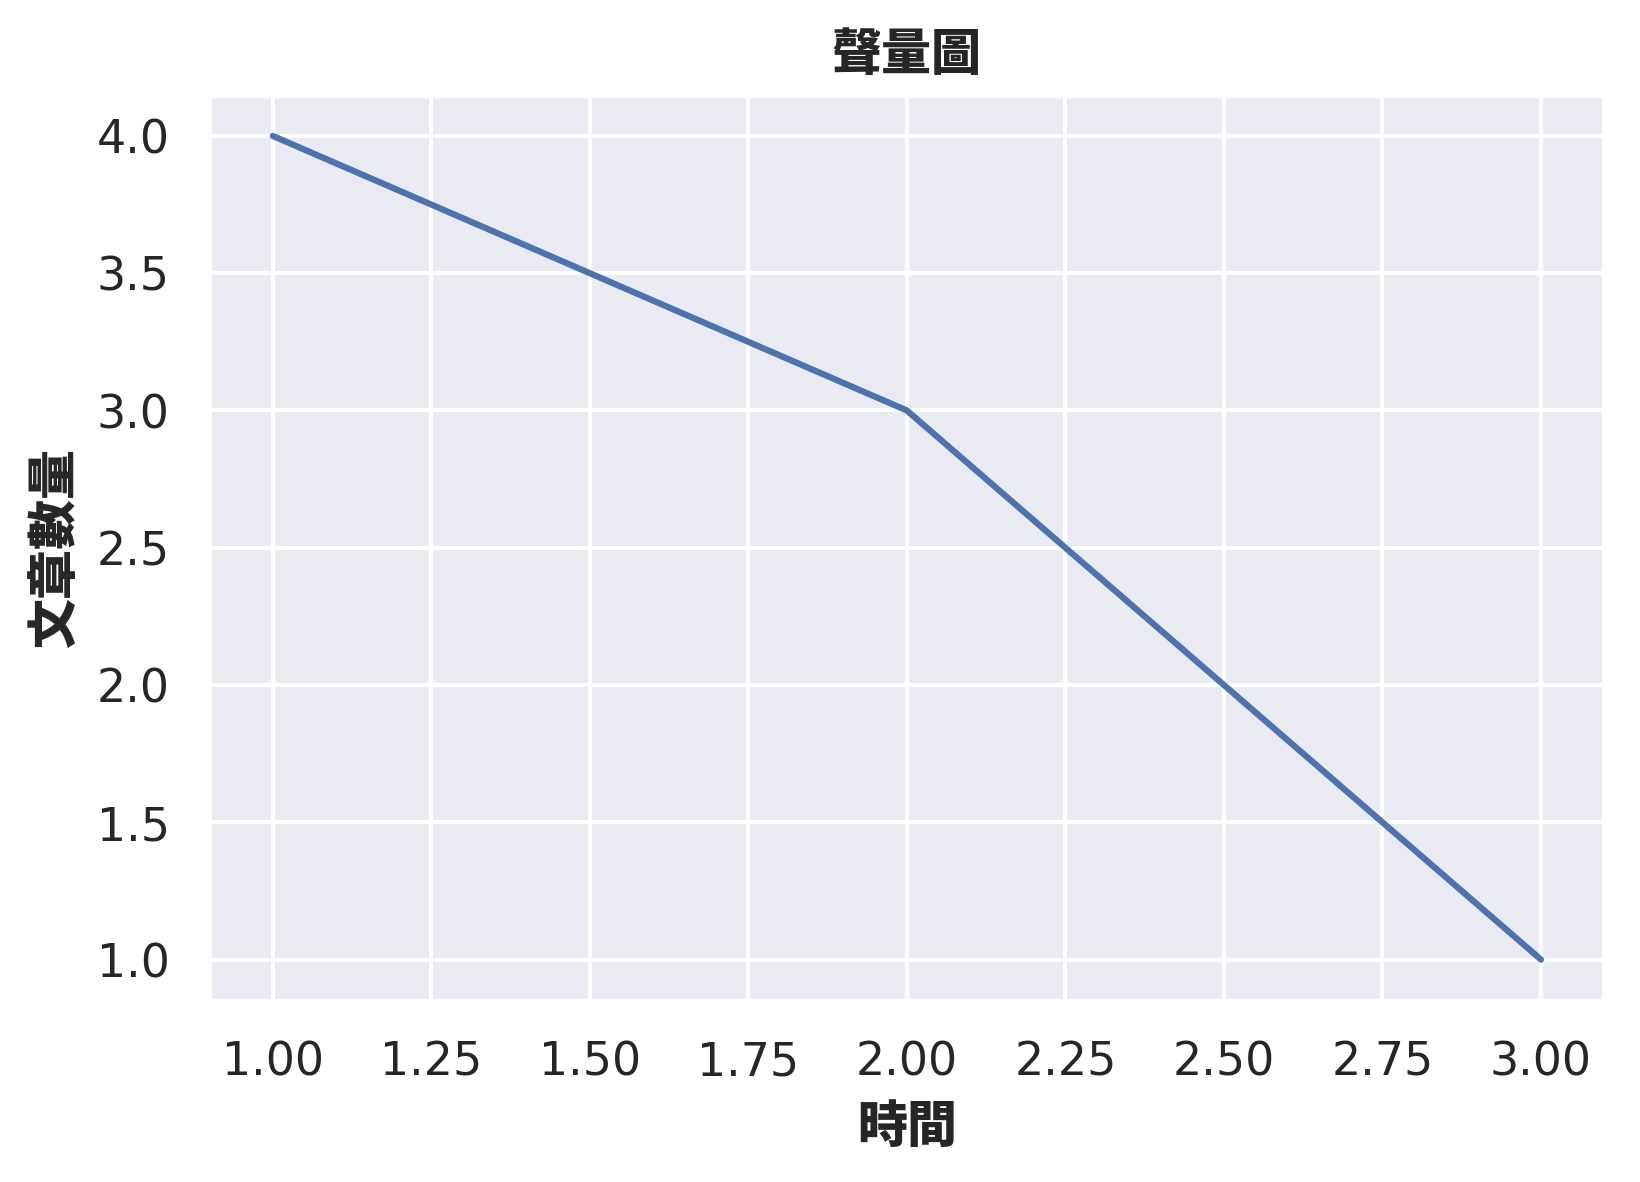

In [267]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt 
myfont = FontProperties(fname=r'/usr/share/fonts/opentype/noto/NotoSansCJK-Black.ttc')
plt.plot((1,2,3),(4,3,1)) 
plt.title("聲量圖",fontproperties=myfont) 
plt.ylabel("文章數量",fontproperties=myfont) 
plt.xlabel("時間",fontproperties=myfont)  
plt.show()

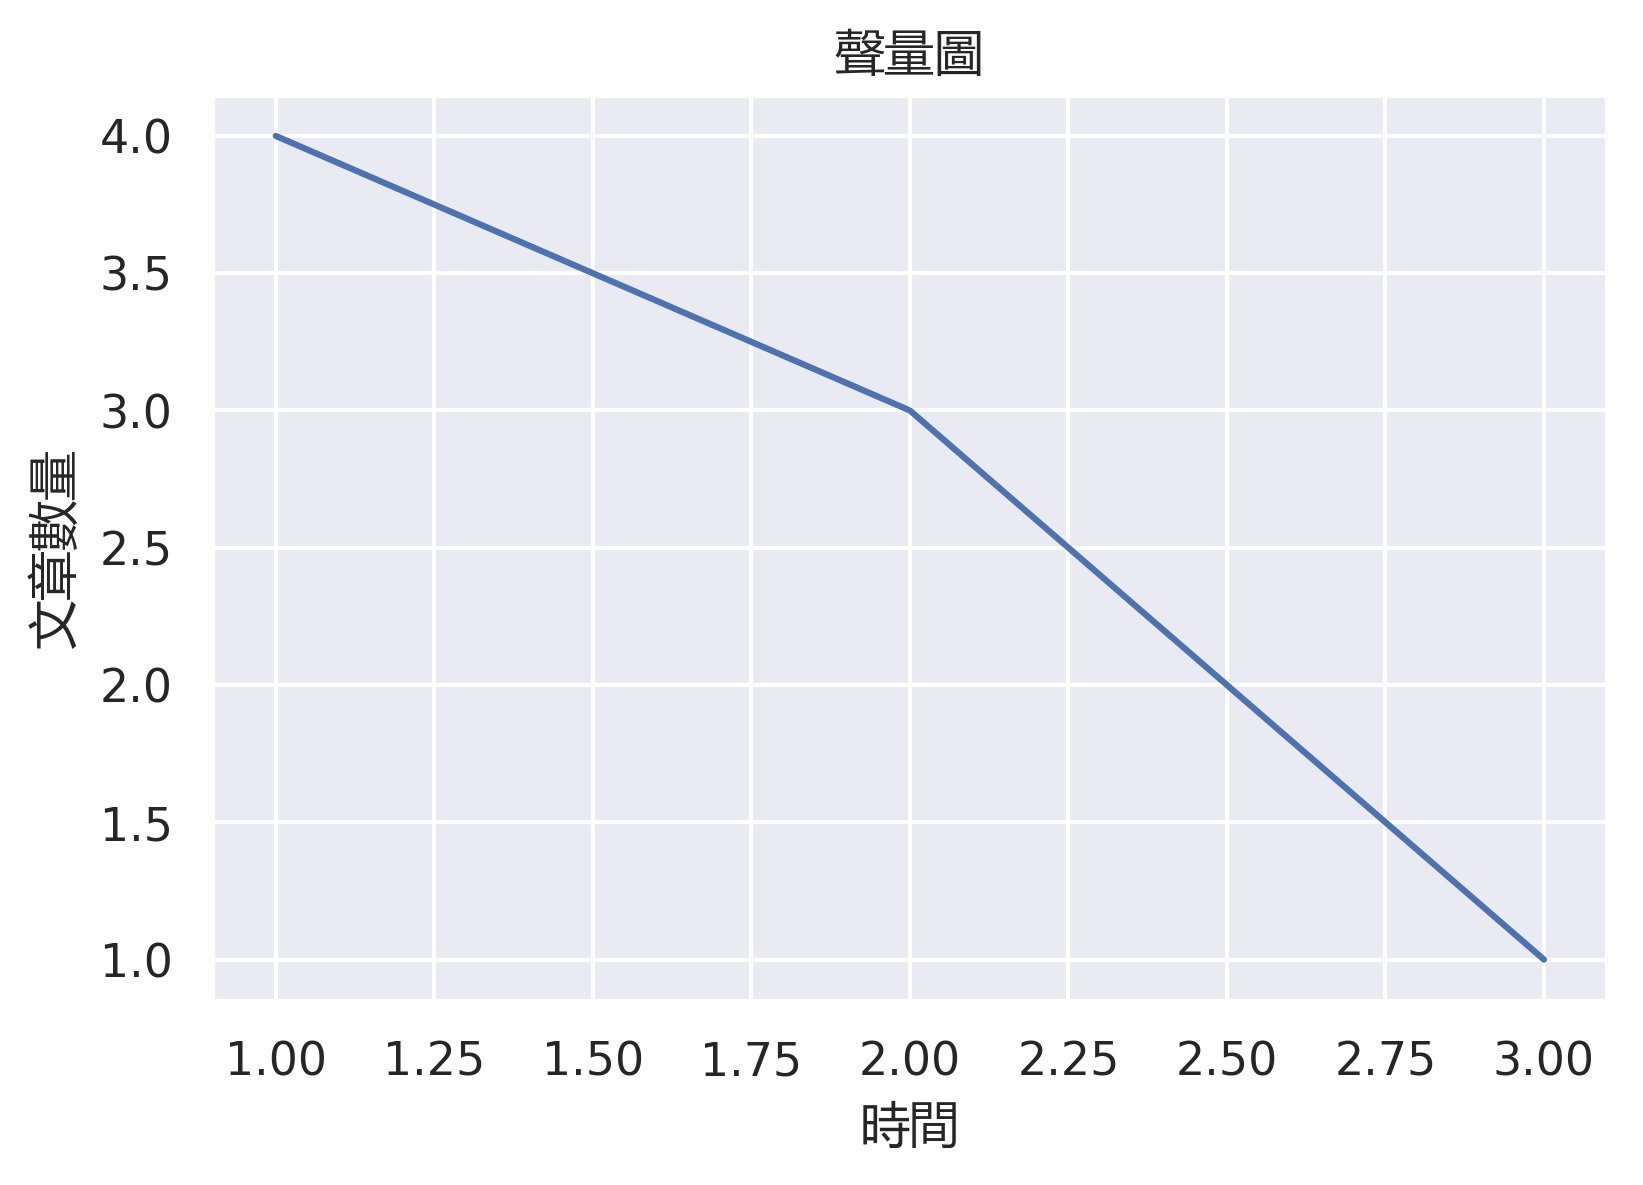

In [268]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt 
myfont = FontProperties(fname=r'/home/gezi/py3env/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/微软雅黑.ttf')
plt.plot((1,2,3),(4,3,1)) 
plt.title("聲量圖",fontproperties=myfont) 
plt.ylabel("文章數量",fontproperties=myfont) 
plt.xlabel("時間",fontproperties=myfont)  
plt.show()

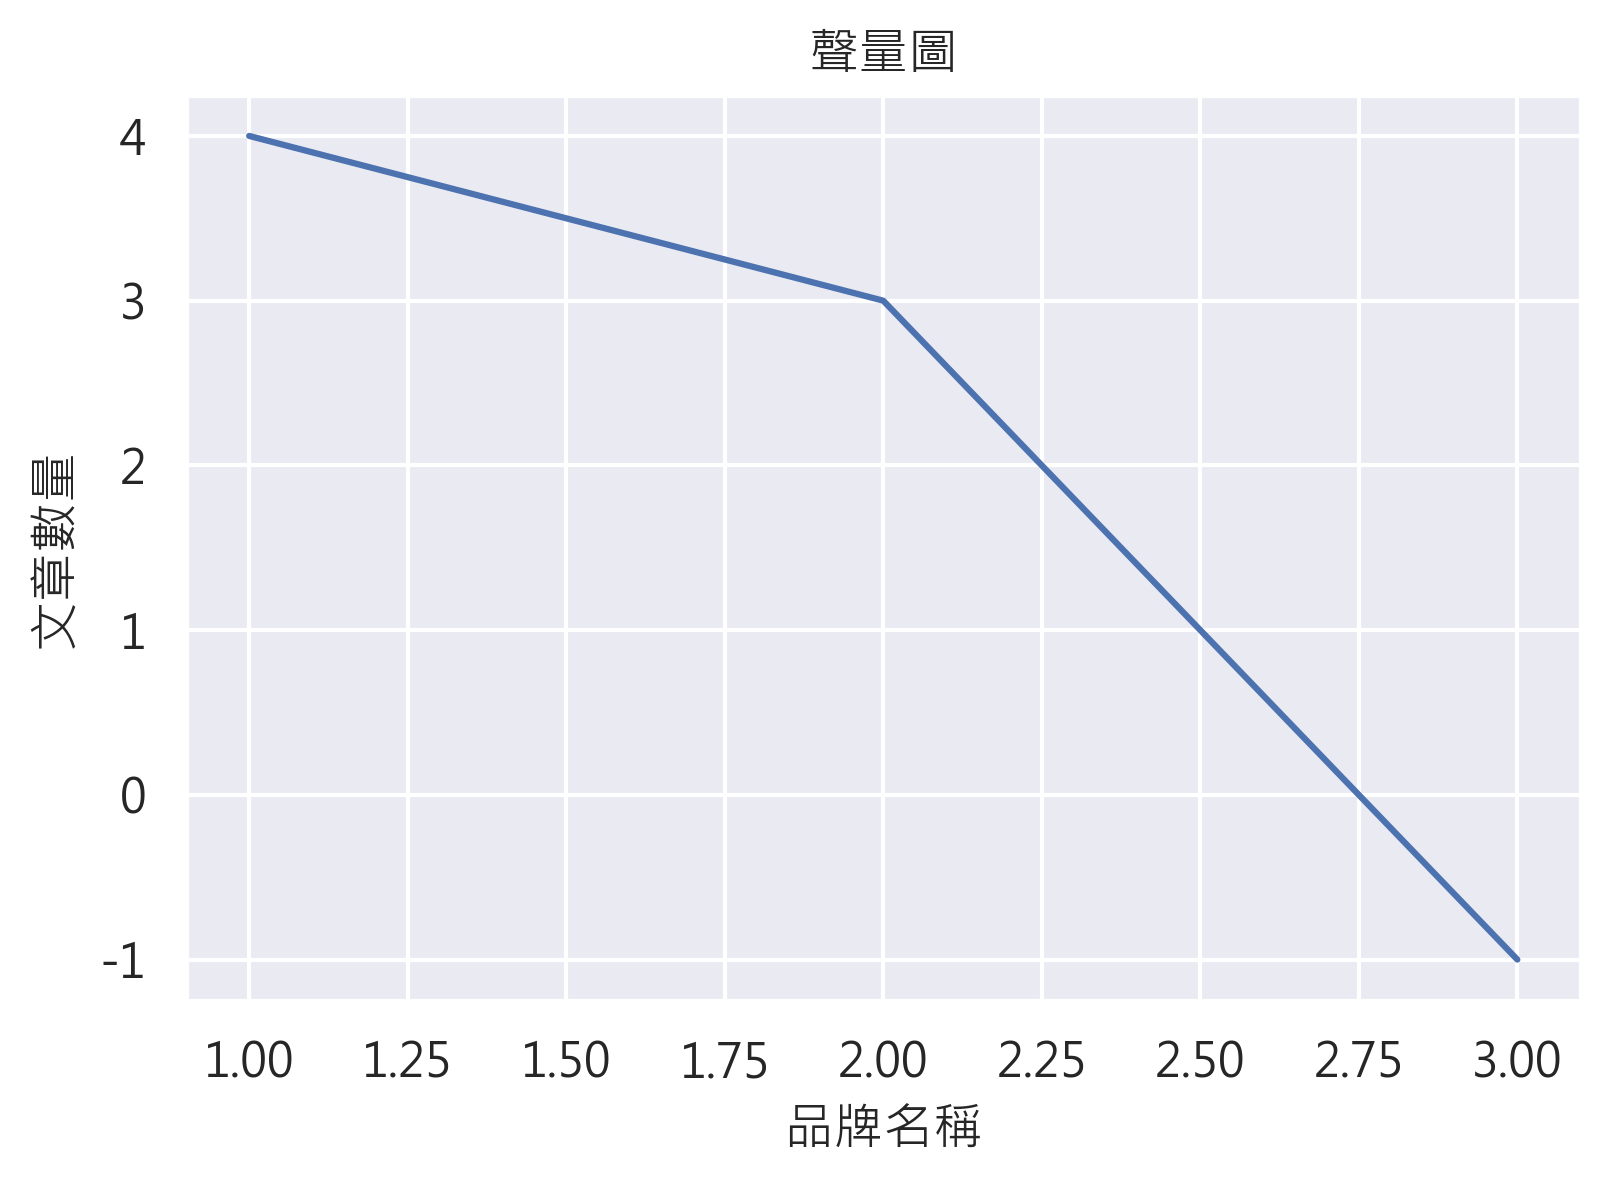

In [269]:
from matplotlib.font_manager import FontProperties

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False
plt.plot((1,2,3),(4,3,-1))
plt.title("聲量圖")
plt.ylabel("文章數量")
plt.xlabel("品牌名稱") 
plt.show()

In [270]:
#find  matplotlib default font
from matplotlib.font_manager import findfont, FontProperties  
findfont(FontProperties(family=FontProperties().get_family())) 

'/home/gezi/py3env/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/微软正黑体.ttf'

In [271]:
!ls /home/gezi/py3env/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf

bak				SourceHanSansSC-ExtraLight.otf
cmb10.ttf			SourceHanSansSC-Heavy.otf
cmex10.ttf			SourceHanSansSC-Light.otf
cmmi10.ttf			SourceHanSansSC-Medium.otf
cmr10.ttf			SourceHanSansSC-Normal.otf
cmss10.ttf			SourceHanSansSC-Regular.otf
cmsy10.ttf			STIXGeneralBolIta.ttf
cmtt10.ttf			STIXGeneralBol.ttf
DejaVuSans-BoldOblique.ttf	STIXGeneralItalic.ttf
DejaVuSans-Bold.ttf		STIXGeneral.ttf
DejaVuSansDisplay.ttf		STIXNonUniBolIta.ttf
DejaVuSansMono-BoldOblique.ttf	STIXNonUniBol.ttf
DejaVuSansMono-Bold.ttf		STIXNonUniIta.ttf
DejaVuSansMono-Oblique.ttf	STIXNonUni.ttf
DejaVuSansMono.ttf		STIXSizFiveSymReg.ttf
DejaVuSans-Oblique.ttf		STIXSizFourSymBol.ttf
DejaVuSans.ttf			STIXSizFourSymReg.ttf
DejaVuSerif-BoldItalic.ttf	STIXSizOneSymBol.ttf
DejaVuSerif-Bold.ttf		STIXSizOneSymReg.ttf
DejaVuSerifDisplay.ttf		STIXSizThreeSymBol.ttf
DejaVuSerif-Italic.ttf		STIXSizThreeSymReg.ttf
DejaVuSerif.ttf			STIXSizTwoSymBol.ttf
LICENSE_STIX			STIXSizTwoSymReg.ttf
simsun.ttc			微软雅黑.ttf
SourceHanSansSC-Bold.otf	

In [272]:
print(len(words))
print(len(alpha))

38
38


In [298]:
#(cm * 1000).astype(np.int32)
amin, amax = alpha.min(), alpha.max() # 求最大最小值
print(amin, amax)
alpha2 = (alpha-amin)/(amax-amin) # (矩阵元素-最小值)/(最大值-最小值)

7.0463e-31 1.0


In [296]:
alpha2

array([[5.6962966e-04, 2.3827146e-01, 1.9244207e-01, ..., 1.1762715e-03,
        1.5607427e-03, 1.4004141e-02],
       [8.9638400e-03, 2.1429629e-05, 3.7175584e-01, ..., 3.6875690e-05,
        3.4903080e-05, 1.1355923e-04],
       [5.8422790e-04, 2.9999776e-02, 1.7293179e-06, ..., 1.8528880e-06,
        2.0678915e-06, 4.6501040e-06],
       ...,
       [5.0387380e-14, 4.1988677e-14, 2.6144565e-14, ..., 2.4400949e-14,
        6.7827570e-06, 6.9768640e-09],
       [7.8991770e-09, 4.6956123e-09, 3.4474346e-09, ..., 8.0138767e-01,
        2.8829898e-09, 9.9814024e-05],
       [5.1758040e-05, 1.1156330e-05, 5.6611130e-06, ..., 6.0195990e-01,
        7.2889090e-02, 2.1053000e-06]])

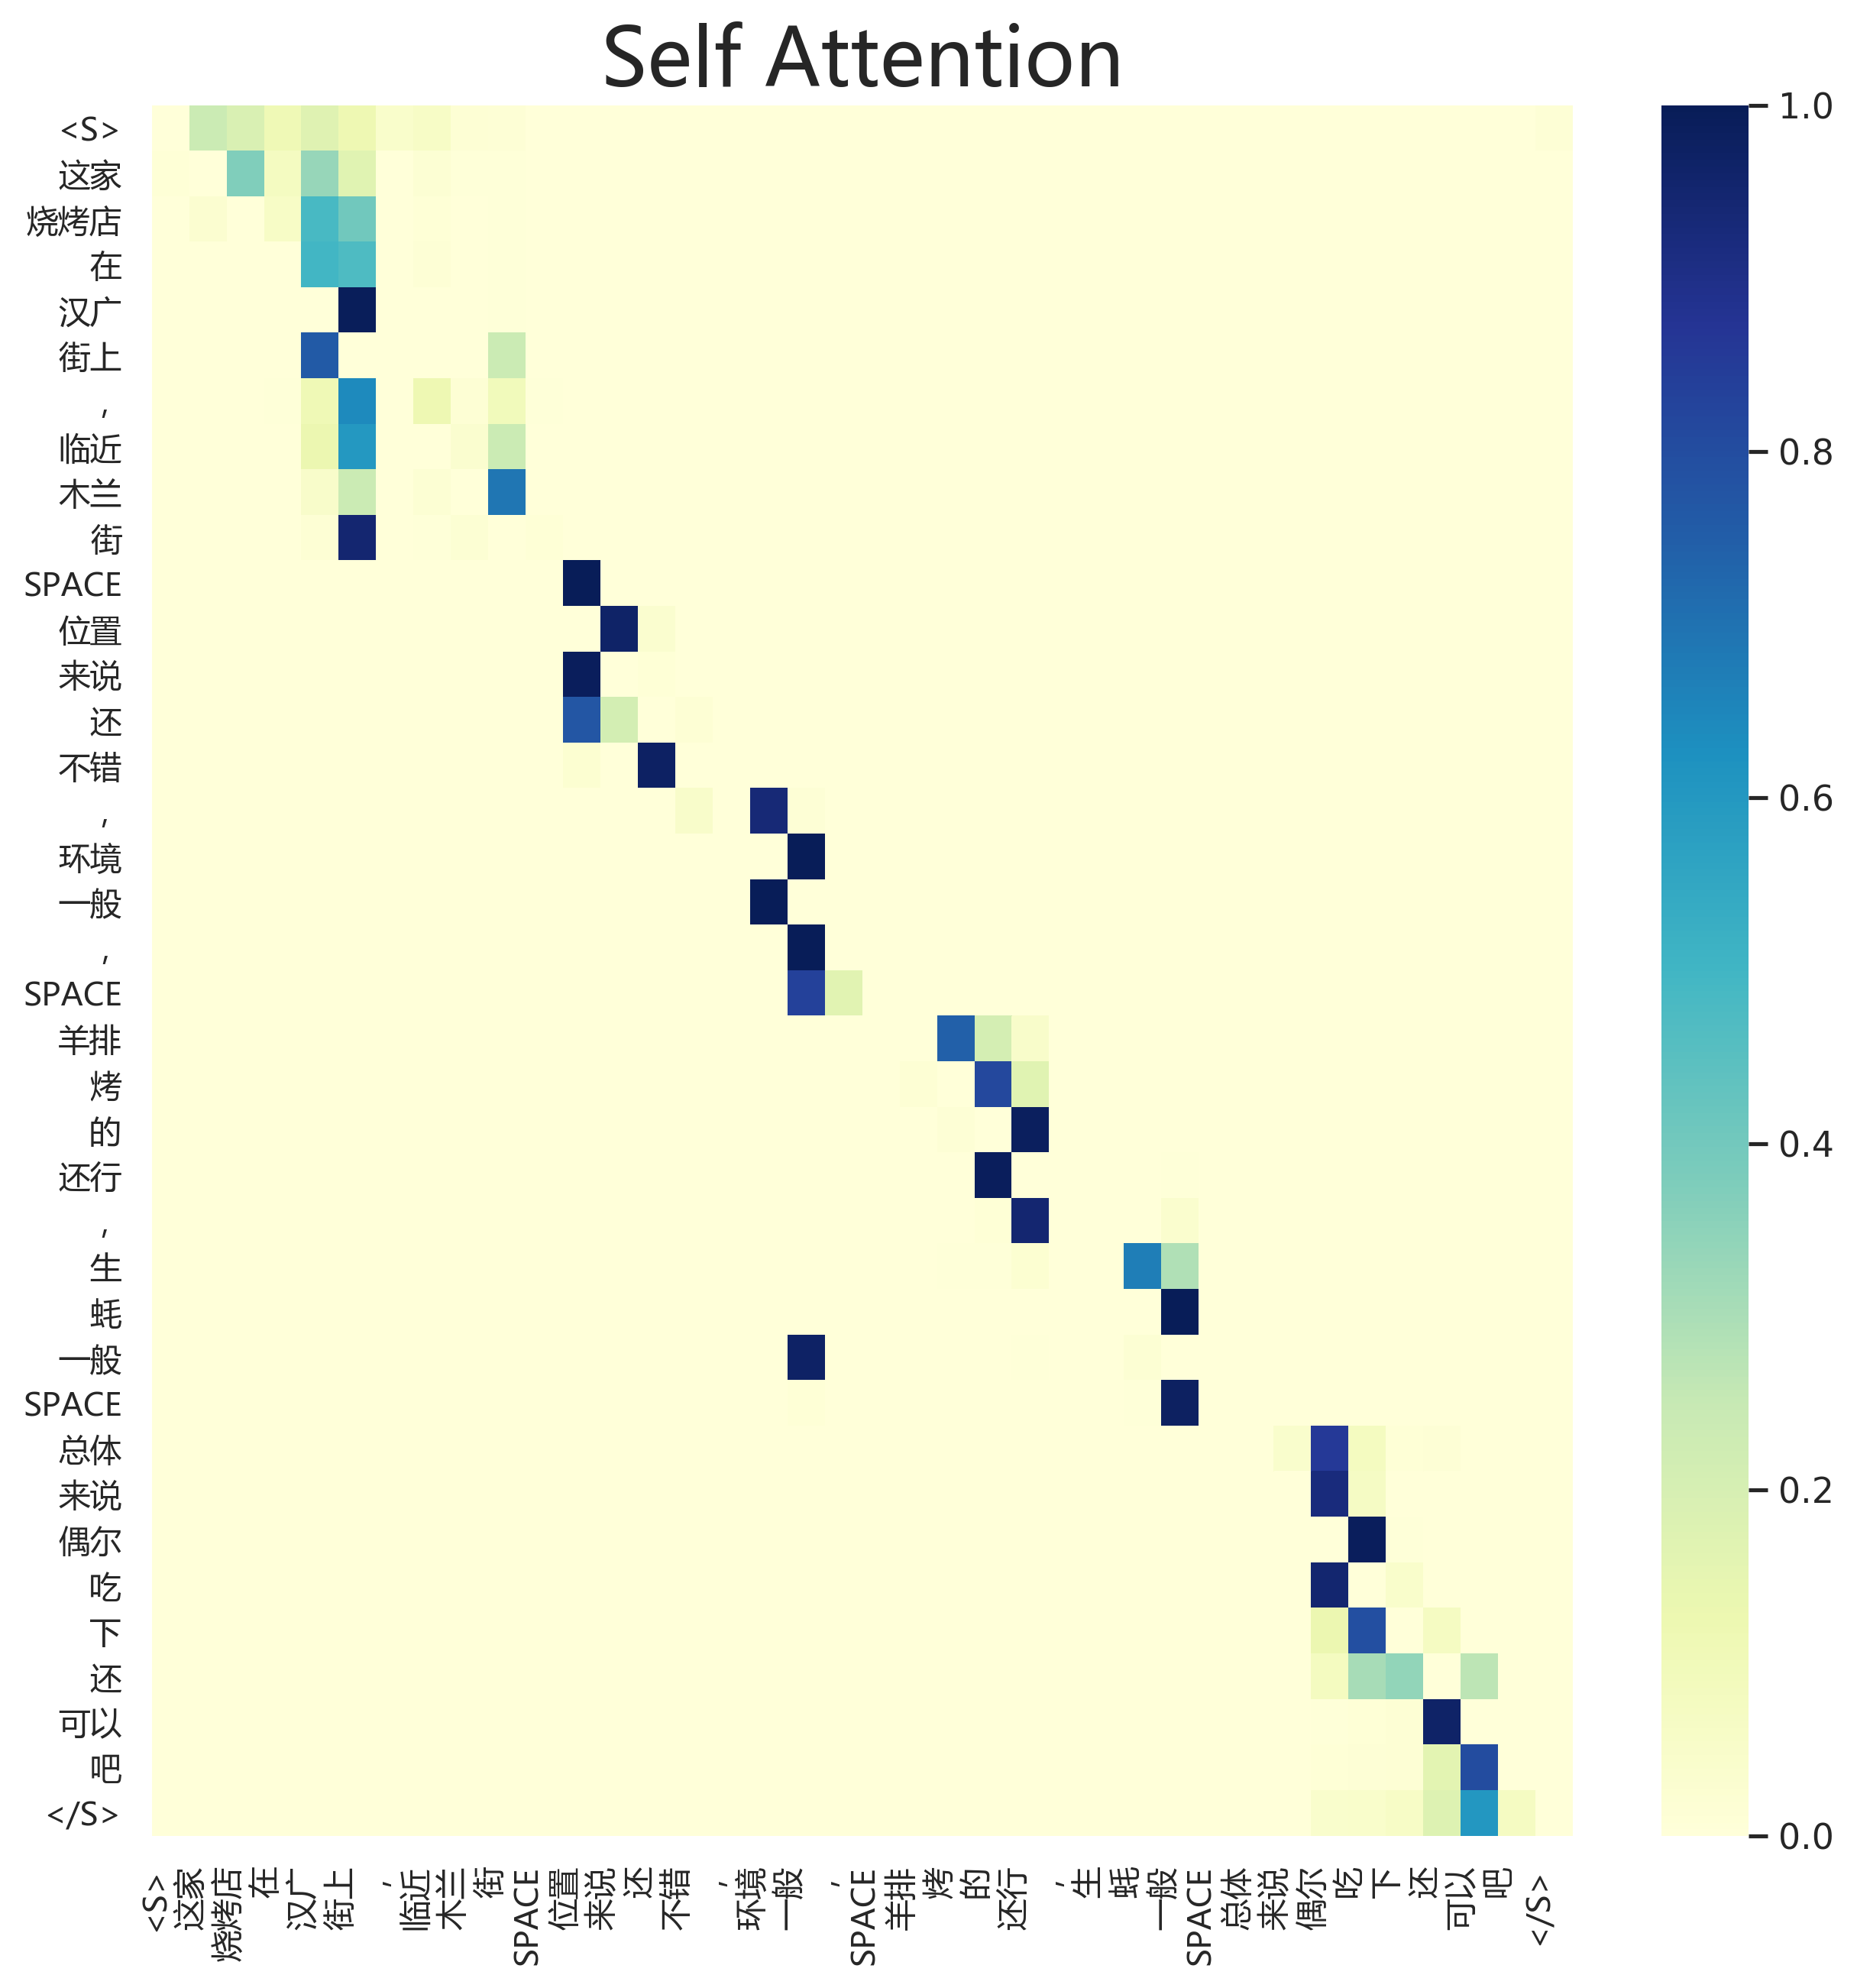

In [309]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.font_manager import FontProperties
import seaborn as sns

dpi = 300
mpl.rcParams['figure.dpi']= dpi

# sns.set(font=['sans-serif'])
# sns.set_style("whitegrid",{"font.sans-serif":['Microsoft JhengHei']})

from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt 
myfont = FontProperties(fname=r'/home/gezi/py3env/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/微软雅黑.ttf')

import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10,10))
#ax = sns.heatmap(cm2, ax=ax,vmin=0, vmax=1,annot=True,fmt ='0.1g', xticklabels=models, yticklabels=models)
#ax = sns.heatmap(alpha,cmap = 'RdBu',ax=ax,vmin=0, vmax=1,fmt ='0.1g', xticklabels=words, yticklabels=words)
ax = sns.heatmap(alpha,cmap="YlGnBu",ax=ax,vmin=0, vmax=1,fmt ='0.1g', xticklabels=words, yticklabels=words)
#设置坐标字体方向
label_y = ax.get_yticklabels()
plt.setp(label_y, rotation=0, horizontalalignment='right',fontproperties=myfont)
label_x = ax.get_xticklabels()
plt.setp(label_x, rotation=90, horizontalalignment='right',fontproperties=myfont)
plt.title('Self Attention',fontproperties=myfont, fontsize=25)#标题
plt.show()

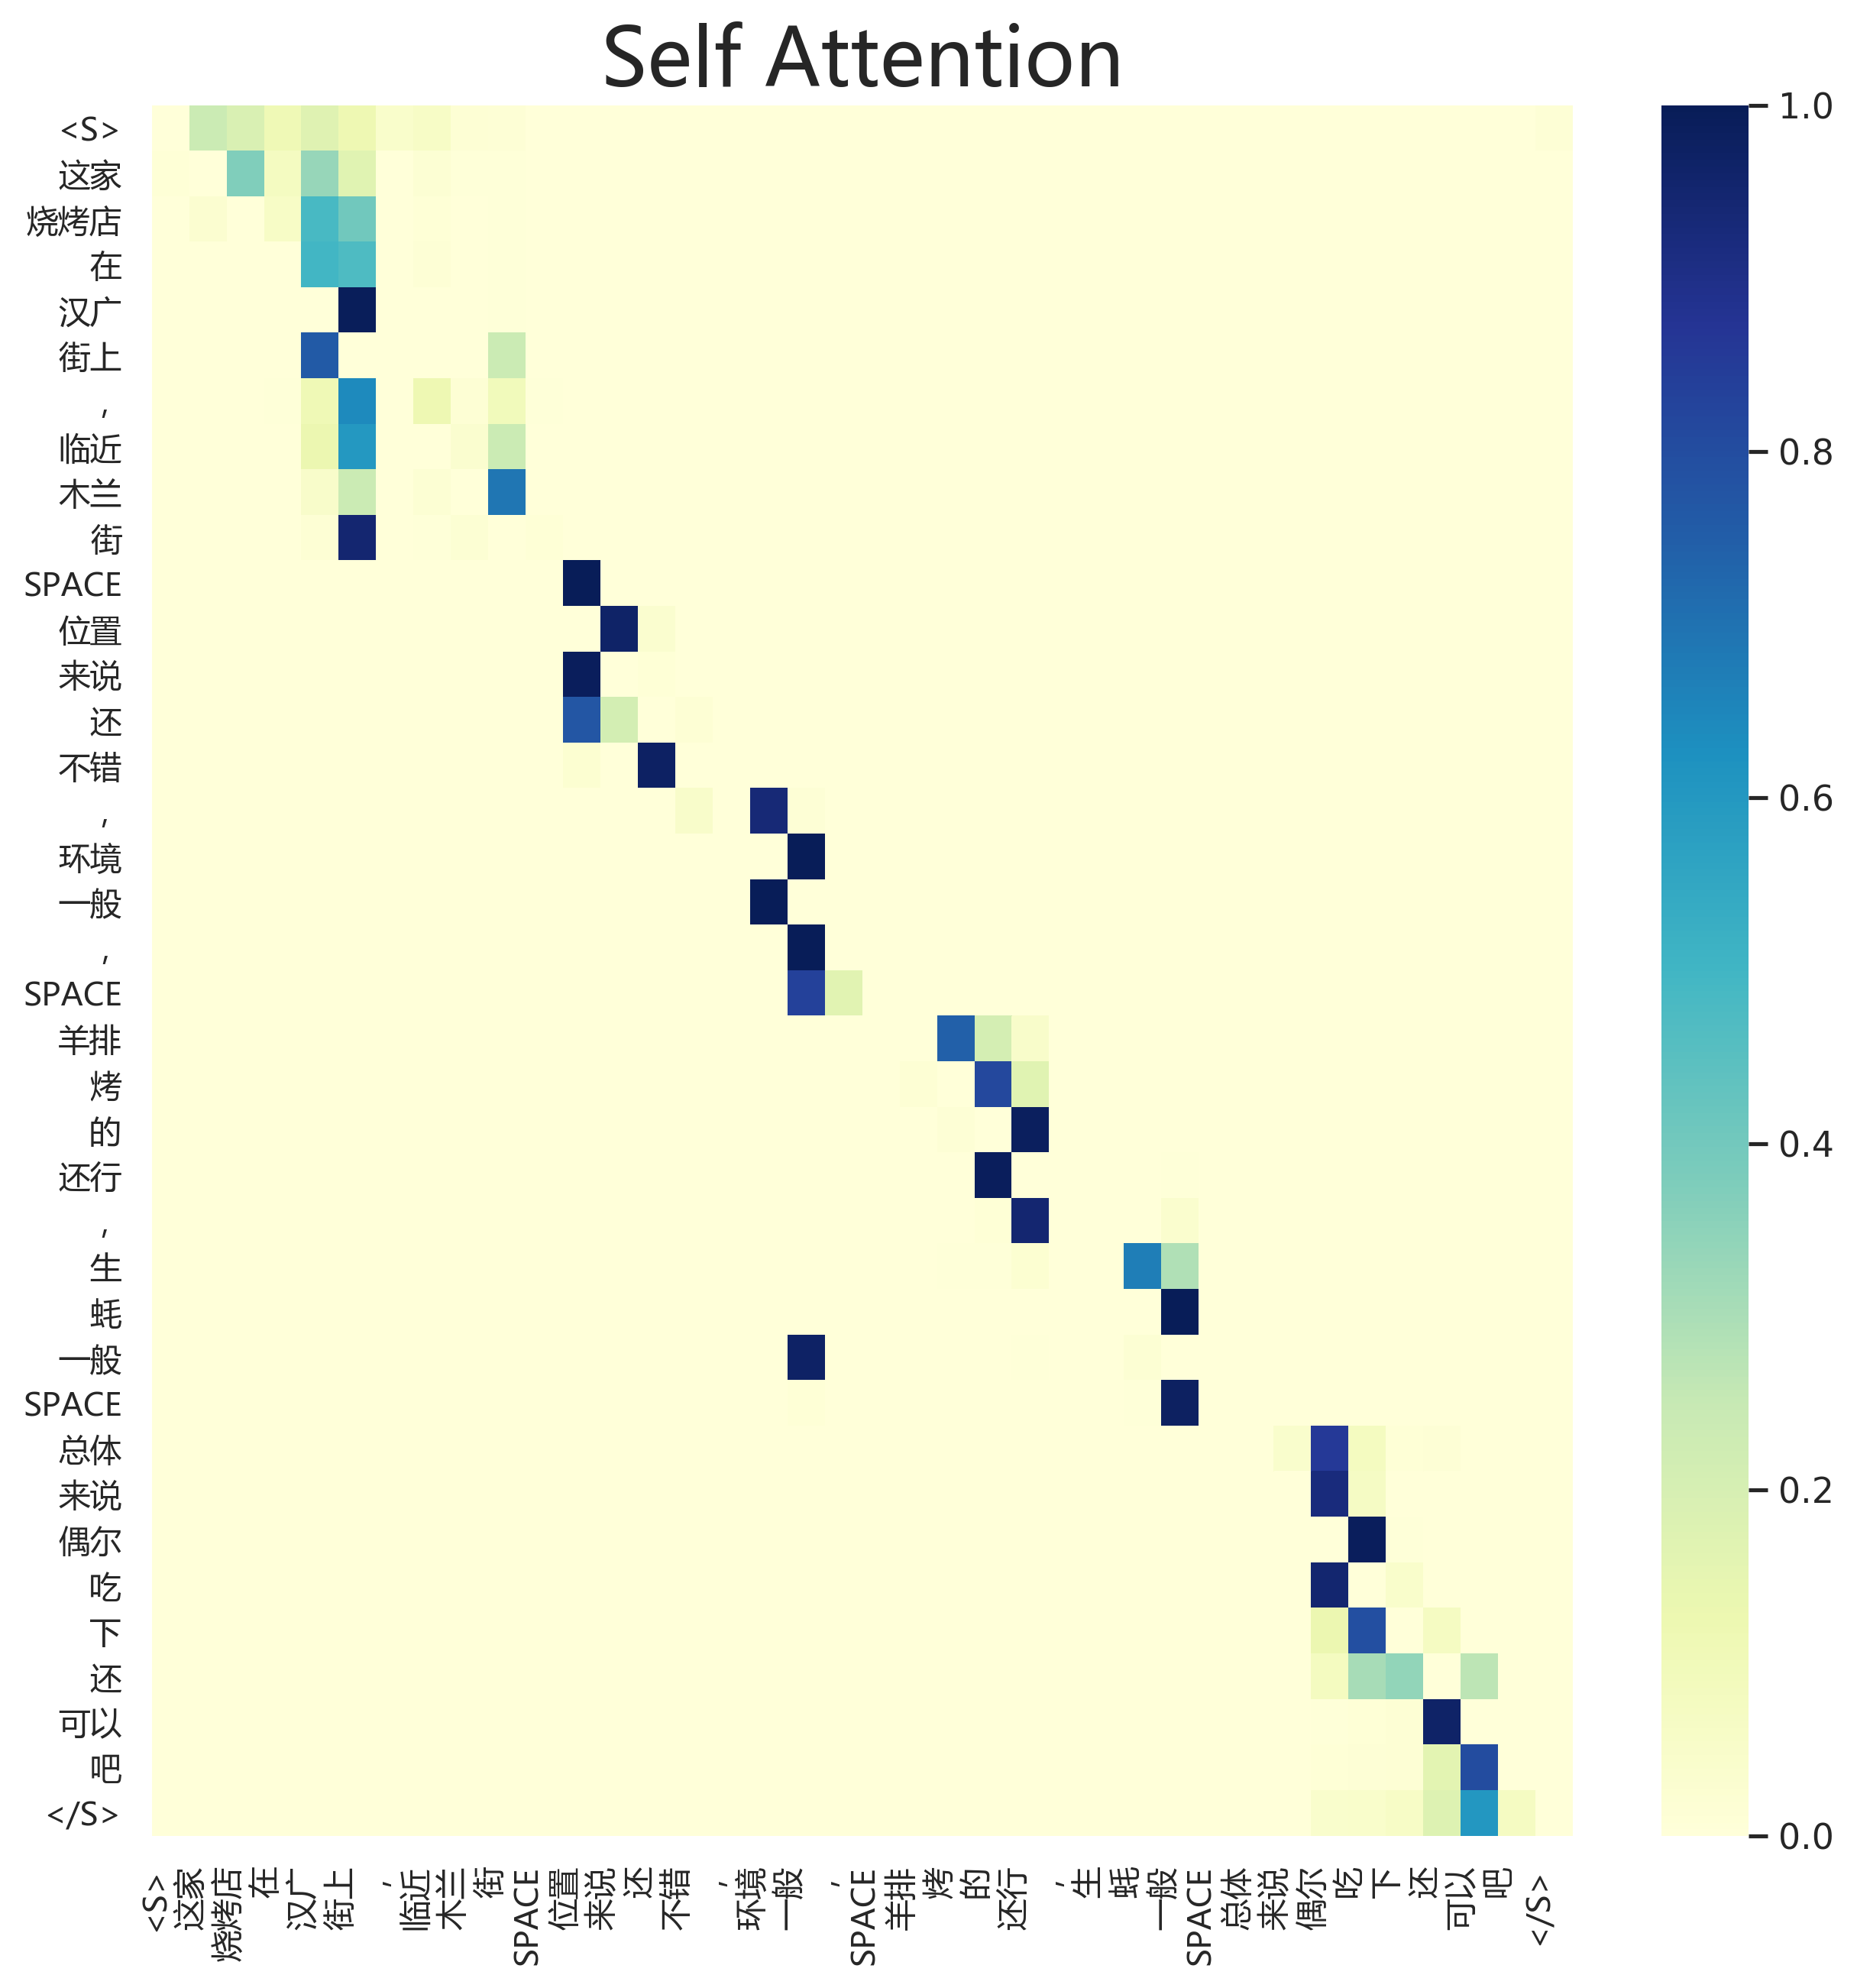

In [308]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.font_manager import FontProperties
import seaborn as sns

dpi = 300
mpl.rcParams['figure.dpi']= dpi

# sns.set(font=['sans-serif'])
# sns.set_style("whitegrid",{"font.sans-serif":['Microsoft JhengHei']})

from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt 
myfont = FontProperties(fname=r'/home/gezi/py3env/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/微软雅黑.ttf')

import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10,10))
#ax = sns.heatmap(cm2, ax=ax,vmin=0, vmax=1,annot=True,fmt ='0.1g', xticklabels=models, yticklabels=models)
#ax = sns.heatmap(alpha,cmap = 'RdBu',ax=ax,vmin=0, vmax=1,fmt ='0.1g', xticklabels=words, yticklabels=words)
ax = sns.heatmap(alpha2,cmap="YlGnBu",ax=ax,vmin=0, vmax=1,fmt ='0.1g', xticklabels=words, yticklabels=words)
#设置坐标字体方向
label_y = ax.get_yticklabels()
plt.setp(label_y, rotation=0, horizontalalignment='right',fontproperties=myfont)
label_x = ax.get_xticklabels()
plt.setp(label_x, rotation=90, horizontalalignment='right',fontproperties=myfont)
plt.title('Self Attention',fontproperties=myfont, fontsize=25)#标题
plt.show()